# EFC3 -  Guilherme Covre Pupio - RA 168958

* Este Notebook apresenta as questões 1 a 5 do EFC3.
* Todas as Saídas geradas e entradas utilizadas neste Notebook estão disponiveis em:
https://github.com/Guipupio/Redes_neuraias/tree/master/EFC3_IA353_1s2019

# Questão 1

* O código a seguir apresenta uma CNN, que é treinada com a base MNIST.

## Observação
* Esta questão apresentou problemas durante a execução

In [2]:
import keras

mnist = keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
x_train, x_test = x_train / 255.0, x_test / 255.0

model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=(3, 3),
 activation='relu',input_shape=(28, 28, 1)))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(10, activation='softmax'))

model.get_config()

model.compile(optimizer='adam',
 loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5)
evaluation = model.evaluate(x_test, y_test)

model.save(r'./input_Q1/mnist_model.h5')

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
60000/60000 [==============================] - 141s 2ms/step - loss: 0.1887 - acc: 0.9432
Epoch 2/5
60000/60000 [==============================] - 144s 2ms/step - loss: 0.0784 - acc: 0.9772
Epoch 3/5
60000/60000 [==============================] - 140s 2ms/step - loss: 0.0611 - acc: 0.9811
Epoch 4/5
60000/60000 [==============================] - 142s 2ms/step - loss: 0.0490 - acc: 0.9848
Epoch 5/5
10000/10000 [==============================] - 4s 434us/step


# Questão 1 - item `A` 

* Utilizarei as seguintes classes:
    * Classe 0: posicao em x_test ->(3:4, 10:11)
    * Classe 1: posicao em x_test ->(2:3, 5:6)
    * Classe 4: posicao em x_test ->(4:5, 6:7)
    
## Execução parte 1

* Segue abaixo a execução para o primeiro conjunto de classes

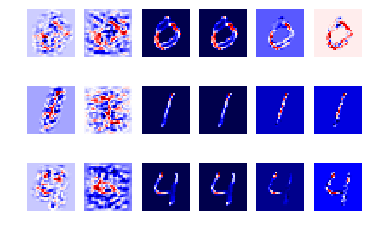

In [42]:
%matplotlib inline
#\end{lstlisting}
#\end{framed}


#Questao 1a:
#-----------
from tensorflow import keras
import innvestigate
import matplotlib.pyplot as plot

# mnist = keras.datasets.mnist
# (x_train, y_train),(x_test, y_test) = mnist.load_data()
# x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
# x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
# x_train, x_test = x_train / 255.0, x_test / 255.0

# model = keras.models.load_model(r'./input_Q1/mnist_model.h5')
model_wo_sm = innvestigate.utils.keras.graph.model_wo_softmax(model)

# Define conjunto de imagens
imagens = [
    (3,4),    # Classe 0
    (2,3),    # Classe 1
    (4,5),    # Classe 4
]

x_label = ['Gradient', 'SmoothGrad', 'DeepTaylor', 'LRPAlphaBeta', 'LRPEpsilon', 'LRPZ']


for i, coordenada in enumerate(imagens):
#     for j, coordenada in enumerate(coordenadas):
    imagem = x_test[coordenada[0]:coordenada[1]]

    ## Gradient
    analyzer = innvestigate.analyzer.Gradient(model=model_wo_sm)
    analysis = analyzer.analyze(imagem)
    plot.subplot(3,6, i*6 +1)
    # Exibe imagem
    plot.imshow(analysis.squeeze(), cmap='seismic',
     interpolation='nearest')
    plot.axis('off')

    ## SmoothGrad

    analyzer = innvestigate.analyzer.SmoothGrad(model=model_wo_sm)
    analysis = analyzer.analyze(imagem)
    plot.subplot(3,6, i*6 +2)
    # Exibe imagem
    plot.imshow(analysis.squeeze(), cmap='seismic', interpolation='nearest')
    plot.axis('off')
    
    ## DeepTaylor
    analyzer = innvestigate.analyzer.DeepTaylor(model=model_wo_sm)
    analysis = analyzer.analyze(imagem)
    plot.subplot(3,6, i*6 +3)
    # Exibe imagem
    plot.imshow(analysis.squeeze(), cmap='seismic', interpolation='nearest')
    plot.axis('off')
    
    ## LRPAlphaBeta
    analyzer = innvestigate.analyzer.LRPAlphaBeta(model=model_wo_sm,alpha=1, beta=0)
    analysis = analyzer.analyze(imagem)
    plot.subplot(3,6, i*6 +4)
    # Exibe imagem
    plot.imshow(analysis.squeeze(), cmap='seismic', interpolation='nearest')
    plot.axis('off')
    
    ## LRPEpsilon
    analyzer = innvestigate.analyzer.LRPEpsilon(model=model_wo_sm, epsilon=1)
    analysis = analyzer.analyze(imagem)
    plot.subplot(3,6, i*6 +5)
    # Exibe imagem
    plot.imshow(analysis.squeeze(), cmap='seismic', interpolation='nearest')
    plot.axis('off')
    
    ## LRPZ
    analyzer = innvestigate.analyzer.LRPZ(model=model_wo_sm)
    analysis = analyzer.analyze(imagem)
    plot.subplot(3,6, i*6 +6)
    # Exibe imagem
    plot.imshow(analysis.squeeze(), cmap='seismic', interpolation='nearest')
    plot.axis('off')
        

## Execução Parte 2

* Segue abaixo a execução para o segundo conjunto de imagens

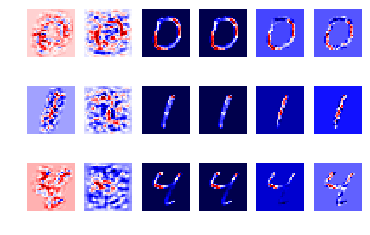

In [44]:
# Define conjunto de imagens
imagens = [
    (10,11),    # Classe 0
    (5,6),    # Classe 1
    (6,7),    # Classe 4
]

x_label = ['Gradient', 'SmoothGrad', 'DeepTaylor', 'LRPAlphaBeta', 'LRPEpsilon', 'LRPZ']


for i, coordenada in enumerate(imagens):
#     for j, coordenada in enumerate(coordenadas):
    imagem = x_test[coordenada[0]:coordenada[1]]

    ## Gradient
    analyzer = innvestigate.analyzer.Gradient(model=model_wo_sm)
    analysis = analyzer.analyze(imagem)
    plot.subplot(3,6, i*6 +1)
    # Exibe imagem
    plot.imshow(analysis.squeeze(), cmap='seismic',
     interpolation='nearest')
    plot.axis('off')

    ## SmoothGrad

    analyzer = innvestigate.analyzer.SmoothGrad(model=model_wo_sm)
    analysis = analyzer.analyze(imagem)
    plot.subplot(3,6, i*6 +2)
    # Exibe imagem
    plot.imshow(analysis.squeeze(), cmap='seismic', interpolation='nearest')
    plot.axis('off')
    
    ## DeepTaylor
    analyzer = innvestigate.analyzer.DeepTaylor(model=model_wo_sm)
    analysis = analyzer.analyze(imagem)
    plot.subplot(3,6, i*6 +3)
    # Exibe imagem
    plot.imshow(analysis.squeeze(), cmap='seismic', interpolation='nearest')
    plot.axis('off')
    
    ## LRPAlphaBeta
    analyzer = innvestigate.analyzer.LRPAlphaBeta(model=model_wo_sm,alpha=1, beta=0)
    analysis = analyzer.analyze(imagem)
    plot.subplot(3,6, i*6 +4)
    # Exibe imagem
    plot.imshow(analysis.squeeze(), cmap='seismic', interpolation='nearest')
    plot.axis('off')
    
    ## LRPEpsilon
    analyzer = innvestigate.analyzer.LRPEpsilon(model=model_wo_sm, epsilon=1)
    analysis = analyzer.analyze(imagem)
    plot.subplot(3,6, i*6 +5)
    # Exibe imagem
    plot.imshow(analysis.squeeze(), cmap='seismic', interpolation='nearest')
    plot.axis('off')
    
    ## LRPZ
    analyzer = innvestigate.analyzer.LRPZ(model=model_wo_sm)
    analysis = analyzer.analyze(imagem)
    plot.subplot(3,6, i*6 +6)
    # Exibe imagem
    plot.imshow(analysis.squeeze(), cmap='seismic', interpolation='nearest')
    plot.axis('off')


## Análise dos métodos

* Cada coluna mostra os resultados visualizados para os respectivos analisadores:
    * `Gradient`
    * `SmoothGrad`
    * `DeepTaylor`
    * `LRPAlphaBeta`
    * `LRPEpsilon`
    * `LRPZ`
* Cada linha representa uma classe que esta sendo analisada:
    * `0`
    * `1`
    * `4`
* Podemos notar que os metodos de DeepTaylor em diante, apresentam

## Metodo SmoothGrad

# Questão 1 - b)

In [15]:
# #Questao 1b:
# #-----------
import keras
from vis.visualization import visualize_activation
from vis.utils import utils
import matplotlib.pyplot as plot

# model = keras.models.load_model('./input_Q1/mnist_model.h5')

## Obtem ultima camada do Model
#layer_idx = utils.find_layer_idx(model, 'dense_2')
layer_idx = -1
model.layers[layer_idx].activation = keras.activations.linear
model = utils.apply_modifications(model)

filter_idx = 9
img = visualize_activation(model2, layer_idx, filter_indices=filter_idx, input_range=(0.0, 1.0), verbose=True,
 max_iter=1000, tv_weight=1.0, lp_norm_weight=0.0)
plot.imshow(img.squeeze(), cmap='seismic', interpolation='nearest')

InvalidArgumentError: conv2d_1_input_5:0 is both fed and fetched.

# Questao 2 

##### Treinamento de GANS

## Parâmetros
* Os parâmetros utilizados para esta Rede Neural foram, os sugeridos pelo roteiro, ou seja
    * Numero total de épocas para treinamento: 30000
    * O Código salva imagens a cada 200 épocas.

In [ ]:
from __future__ import print_function, division

from keras.datasets import mnist
from keras.layers import Input, Dense, Reshape, Flatten, Dropout
from keras.layers import BatchNormalization, Activation, ZeroPadding2D
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.convolutional import UpSampling2D, Conv2D
from keras.models import Sequential, Model
from keras.optimizers import Adam

import matplotlib.pyplot as plt

import sys

import numpy as np

class GAN():
    def __init__(self):
        self.img_rows = 28
        self.img_cols = 28
        self.channels = 1
        self.img_shape = (self.img_rows, self.img_cols, self.channels)
        self.latent_dim = 100

        optimizer = Adam(0.0002, 0.5)

        # Build and compile the discriminator
        self.discriminator = self.build_discriminator()
        self.discriminator.compile(loss='binary_crossentropy',
            optimizer=optimizer,
            metrics=['accuracy'])

        # Build the generator
        self.generator = self.build_generator()

        # The generator takes noise as input and generates imgs
        z = Input(shape=(self.latent_dim,))
        img = self.generator(z)

        # For the combined model we will only train the generator
        self.discriminator.trainable = False

        # The discriminator takes generated images as input and determines validity
        validity = self.discriminator(img)

        # The combined model  (stacked generator and discriminator)
        # Trains the generator to fool the discriminator
        self.combined = Model(z, validity)
        self.combined.compile(loss='binary_crossentropy', optimizer=optimizer)


    def build_generator(self):

        model = Sequential()

        model.add(Dense(256, input_dim=self.latent_dim))
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Dense(512))
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Dense(1024))
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Dense(np.prod(self.img_shape), activation='tanh'))
        model.add(Reshape(self.img_shape))

        model.summary()

        noise = Input(shape=(self.latent_dim,))
        img = model(noise)

        return Model(noise, img)

    def build_discriminator(self):

        model = Sequential()

        model.add(Flatten(input_shape=self.img_shape))
        model.add(Dense(512))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dense(256))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dense(1, activation='sigmoid'))
        model.summary()

        img = Input(shape=self.img_shape)
        validity = model(img)

        return Model(img, validity)

    def train(self, epochs, batch_size=128, sample_interval=50):

        # Load the dataset
        (X_train, _), (_, _) = mnist.load_data()

        # Rescale -1 to 1
        X_train = X_train / 127.5 - 1.
        X_train = np.expand_dims(X_train, axis=3)

        # Adversarial ground truths
        valid = np.ones((batch_size, 1))
        fake = np.zeros((batch_size, 1))

        for epoch in range(epochs):

            # ---------------------
            #  Train Discriminator
            # ---------------------

            # Select a random batch of images
            idx = np.random.randint(0, X_train.shape[0], batch_size)
            imgs = X_train[idx]

            noise = np.random.normal(0, 1, (batch_size, self.latent_dim))

            # Generate a batch of new images
            gen_imgs = self.generator.predict(noise)

            # Train the discriminator
            d_loss_real = self.discriminator.train_on_batch(imgs, valid)
            d_loss_fake = self.discriminator.train_on_batch(gen_imgs, fake)
            d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

            # ---------------------
            #  Train Generator
            # ---------------------

            noise = np.random.normal(0, 1, (batch_size, self.latent_dim))

            # Train the generator (to have the discriminator label samples as valid)
            g_loss = self.combined.train_on_batch(noise, valid)

            # Plot the progress
            print ("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" % (epoch, d_loss[0], 100*d_loss[1], g_loss))

            # If at save interval => save generated image samples
            if epoch % sample_interval == 0:
                self.sample_images(epoch)

    def sample_images(self, epoch):
        r, c = 5, 5
        noise = np.random.normal(0, 1, (r * c, self.latent_dim))
        gen_imgs = self.generator.predict(noise)

        # Rescale images 0 - 1
        gen_imgs = 0.5 * gen_imgs + 0.5

        fig, axs = plt.subplots(r, c)
        cnt = 0
        for i in range(r):
            for j in range(c):
                axs[i,j].imshow(gen_imgs[cnt, :,:,0], cmap='gray')
                axs[i,j].axis('off')
                cnt += 1
        fig.savefig("images_Q2/%d.png" % epoch)
        plt.close()


if __name__ == '__main__':
    gan = GAN()
    gan.train(epochs=30000, batch_size=32, sample_interval=200)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_43 (Dense)             (None, 512)               401920    
_________________________________________________________________
leaky_re_lu_31 (LeakyReLU)   (None, 512)               0         
_________________________________________________________________
dense_44 (Dense)             (None, 256)               131328    
_________________________________________________________________
leaky_re_lu_32 (LeakyReLU)   (None, 256)               0         
_________________________________________________________________
dense_45 (Dense)             (None, 1)                 257       
Total params: 533,505
Trainable params: 533,505
Non-trainable params: 0
_________________________________________________________________
____

# Imagens Geradas - GAN

## Imagem Primeira Época
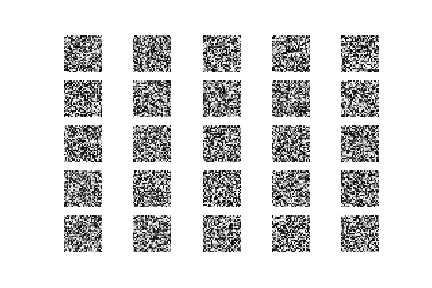

## Imagem Durante a Época 15000
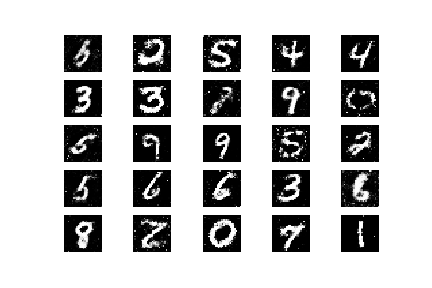

## Penultima Imagem (Época 29600)
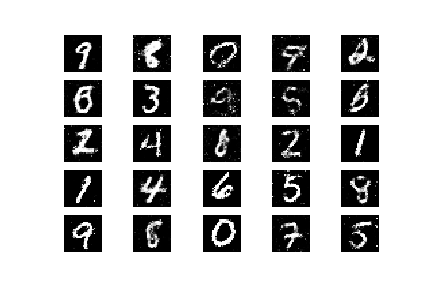

## Ultima imagem (Época 29800)
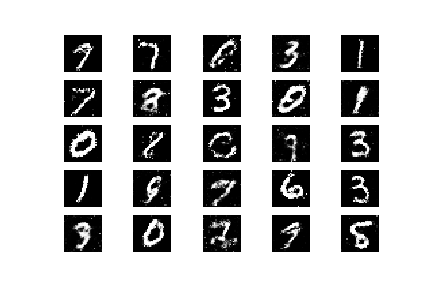

# Questão 3

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


/home/pupio/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:73: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
/home/pupio/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:77: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/10
Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10


/home/pupio/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:79: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
/home/pupio/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:89: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`


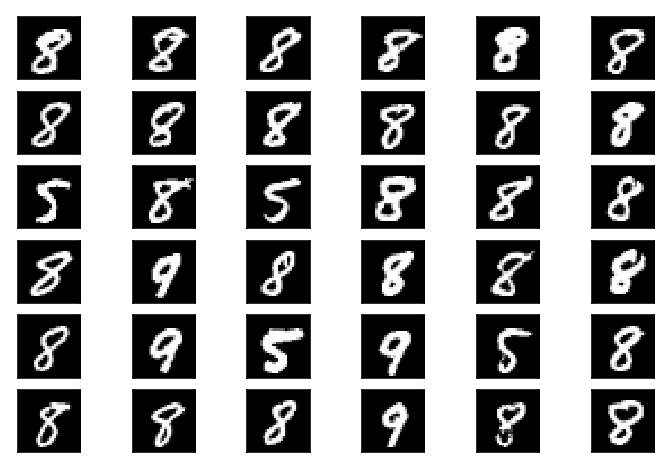

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.neighbors import NearestNeighbors

from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Convolution2D, MaxPooling2D, Flatten, Input
from keras.optimizers import adam
from keras.utils.np_utils import to_categorical

%config InlineBackend.figure_format = 'retina'

train = pd.read_csv(r"./input_Q3/train.csv")

X_train = train.iloc[:,1:].values
X_train = X_train.reshape(X_train.shape[0], 28, 28) #reshape to rectangular
X_train = X_train/255 #pixel values are 0 - 255 - this makes puts them in the range 0 - 1

y_train = train["label"].values

#define a function that allows us to see the digits:
def show(img):
    plt.imshow(img, cmap = "gray", interpolation = "none")
    
img = X_train[10]
show(img)

pd.DataFrame(img)

#generating a random 28 by 28 image:
rand_img = np.random.randint(0, 255, (28, 28))
rand_img = rand_img/255.0

show(rand_img)

rand_direction = np.random.rand(28, 28) 

for i in range(16):
    plt.subplot(4,4,i+1)
    show(img + i/4*rand_direction)    
    plt.xticks([])
    plt.yticks([])
    
X_flat = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2])

knn = NearestNeighbors(5000)

knn.fit(X_flat[:5000])

distances, neighbors = knn.kneighbors(img.flatten().reshape(1, -1))
neighbors = neighbors[0]
distances = distances[0]

plt.hist(distances[1:])
for digit_num, num in enumerate(neighbors[:36]):
    plt.subplot(6,6,digit_num+1)
    grid_data = X_train[num]  # reshape from 1d to 2d pixel array
    show(grid_data)
    plt.xticks([])
    plt.yticks([])
input_img = Input(shape=(784,))
encoded = Dense(64, activation='relu')(input_img)

encoded = Dense(2)(encoded) #keep it linear here.

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(784, activation = 'sigmoid')(decoded)

autoencoder = Model(input=input_img, output=decoded)

autoencoder.compile(optimizer = "adam", loss = "mse")
autoencoder.fit(X_flat, X_flat, batch_size = 128,
                nb_epoch = 10, verbose = 3)

encoder = Model(input = input_img, output = encoded)

#building the decoder:
encoded_input = Input(shape=(2,))
encoded_layer_1 = autoencoder.layers[-2]
encoded_layer_2 = autoencoder.layers[-1]


decoder = encoded_layer_1(encoded_input)
decoder = encoded_layer_2(decoder)
decoder = Model(input=encoded_input, output=decoder)


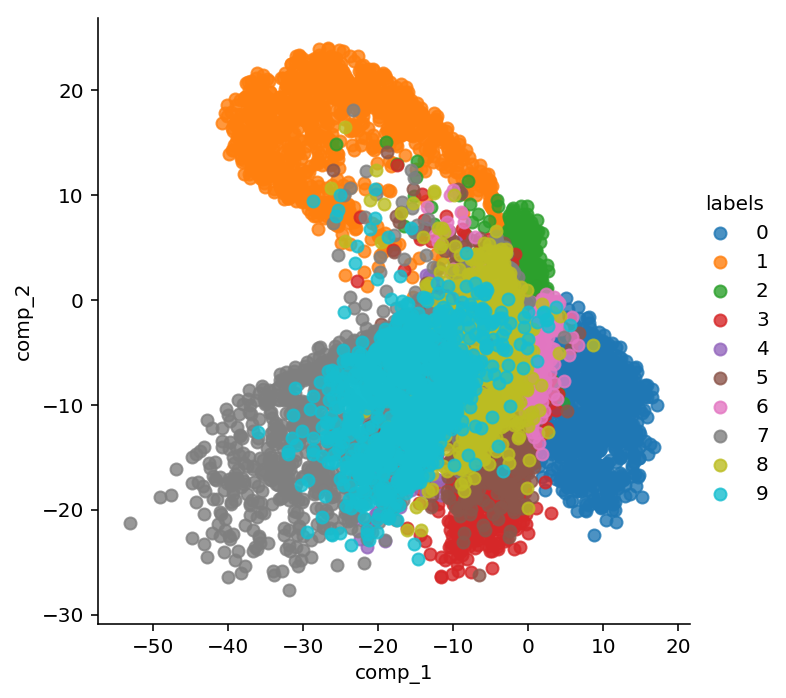

In [22]:

import seaborn as sns

X_proj = encoder.predict(X_flat[:10000])
X_proj.shape

proj = pd.DataFrame(X_proj)
proj.columns = ["comp_1", "comp_2"]
proj["labels"] = y_train[:10000]
sns.lmplot("comp_1", "comp_2",hue = "labels", data = proj, fit_reg=False)


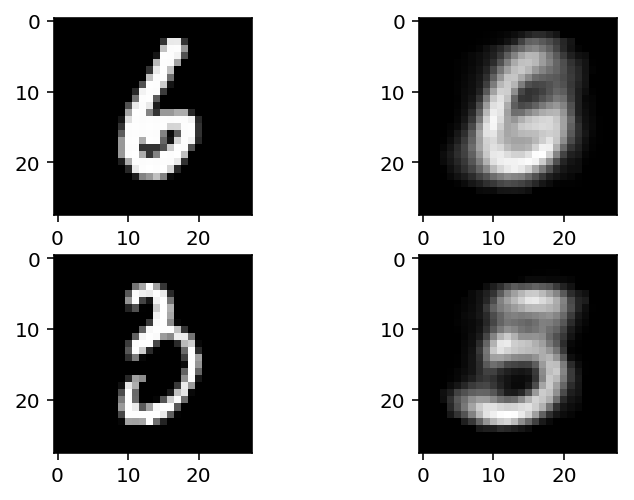

In [23]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt

#define a function that allows us to see the digits:
def show(img):
    plt.imshow(img, cmap = "gray", interpolation = "none")
    
    
#how well does the autoencoder decode:w1
plt.subplot(2,2,1)
show(X_train[160])
plt.subplot(2,2,2)
show(autoencoder.predict(np.expand_dims(X_train[160].flatten(), 0)).reshape(28, 28))
plt.subplot(2,2,3)
show(X_train[150])
plt.subplot(2,2,4)
show(autoencoder.predict(np.expand_dims(X_train[150].flatten(), 0)).reshape(28, 28))


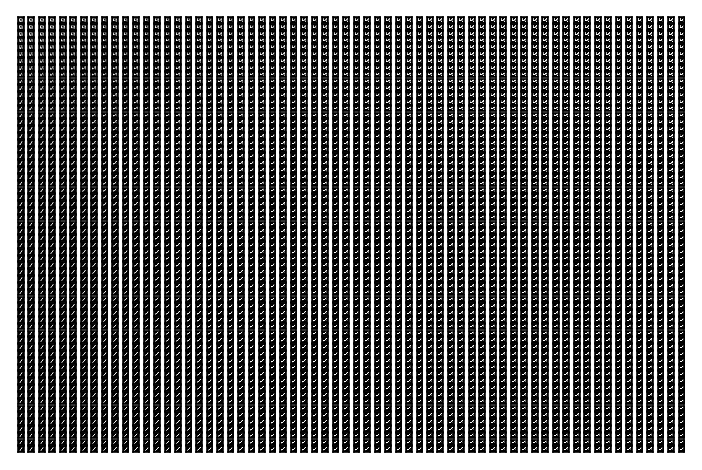

In [20]:
%matplotlib inline
# config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt

#define a function that allows us to see the digits:
def show(img):
    plt.imshow(img, cmap = "gray", interpolation = "none")

#moving along both x and y axis:
for i in range(64):
    for j in range(64):
        plt.subplot(64,64,i*64 + j+1)
        pt = np.array([[j/3,i/3]])
        plt.xticks([])
        plt.yticks([])
#         print(pt)
        
        show(decoder.predict(pt).reshape((28, 28)))
    

# Questão 4

* ## Parte A:
    * Dentre as quatro possibilidades de redes já treinadas, escolhi a `reddit_apple_android.hdf5`.
    * Pode-se observar que a variação do parâmetro `temperature` tem bastante influência sobre o conteúdo da frase gerada. No caso observado, para valores pequenos de `temperature` a frase gerada parece mais coerente com a realidade, assim, com o aumento de `temperature`, a coerência da frase com a realidade é distorcida e com `temperature=1.0` já temos uma frase sem sentido. 
    * O sintoma é ainda mais forte quando `temperature >= 1.25` onde até mesmos caracteres não pertencentes ao ASCII são geradados na frase. Em outros testes que realizei com valores ainda mais altos de `temperature` até emojis são gerados no terminal.
    
    * Por fim, podemos dizer que o parâmetro `temperature` causa uma caracteristica de "criatividade" para a máquina. Quanto maior este parâmetro, mais "criativa" é a saída da máquina.
    
    

In [11]:
# Parte A - Verificando frases com base no parametro temperature
from textgenrnn import textgenrnn

## Importa Rede ja treinada
meu_gerador = textgenrnn('./weights_Q4/reddit_apple_android.hdf5')

temperatures=[0.1, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 2.0, 3.0]

for temperature in temperatures:
    print("Parâmetro Temperature = {}".format(temperature))
    meu_gerador.generate(interactive=False, temperature=temperature)

Parâmetro Temperature = 0.1
Apple Releases iOS 10.3.1 With Bug Fixes

Parâmetro Temperature = 0.25
Apple should make PiP on iOS an user option not something controlled by developer (and get abused by Youtube for example)

Parâmetro Temperature = 0.5
Apple Is Working on a Dedicated Chip to Power AI on Devices

Parâmetro Temperature = 0.75
The Tabron becamp dumbile exclusives right now now how has been tilling up by reported?

Parâmetro Temperature = 1.0
Apple Total fixed the S8 week with the FBKs 17: virtuate tab and USB-AndaeP and most lovely on Apple Watch

Parâmetro Temperature = 1.25
PSA: Google shutdo remaps angles cerentomed me

Parâmetro Temperature = 1.5
Something creepy and I wi｡hed thire, not her including , bring Explowing and auto-W×ttlracking

Parâmetro Temperature = 2.0
Alleged̫ 8 ürbe）marts off to oｏ_30-83 mill0ncing phone and 3-minute Ma High͍ndˢEgal much newerd✝el market hrleash C Turk

Parâmetro Temperature = 3.0
V"ｅʇjfaquイ>̯r gv̥z► n͖и G★aQSD~つ



# Questão 4

## Parte B

   * O objetivo desta seção é treinar uma rede neural tendo como base um livro em português. O livro escolhido foi o apresentado no exemplo `domcasmurro`.
   * A seguir realizei o treinamento da Rede com base no livro. Ao fim do treino, salvei os pesos adquiridos ao longo do treinamento
   * Por fim, o ultimo bloco desta questão exibe a execução de uma geração de texto iterativa.
    

In [18]:
from textgenrnn import textgenrnn

# define caminho da base
file_path = "./input_Q4/domcasmurro.txt"
# Instancia a RNN
textgen = textgenrnn()
textgen.reset()
# Treina RNN
textgen.train_from_file(file_path, new_model=True, num_epochs=20,
gen_epochs=10, word_level=True)

# Salva pesos adquiridos no treinamento
textgen.save('./weights_Q4/domcasmurro.hdf5')

8,547 texts collected.
Training new model w/ 2-layer, 128-cell LSTMs
Training on 92,383 word sequences.
Epoch 1/20
721/721 [==============================] - 240s 333ms/step - loss: 6.0846
Epoch 2/20
721/721 [==============================] - 220s 305ms/step - loss: 5.3899
Epoch 3/20
721/721 [==============================] - 220s 306ms/step - loss: 4.7600
Epoch 4/20
721/721 [==============================] - 220s 306ms/step - loss: 4.3139
Epoch 5/20
721/721 [==============================] - 220s 305ms/step - loss: 3.8860
Epoch 6/20
721/721 [==============================] - 220s 305ms/step - loss: 3.4670
Epoch 7/20
721/721 [==============================] - 222s 308ms/step - loss: 3.0759
Epoch 8/20
721/721 [==============================] - 220s 305ms/step - loss: 2.7262
Epoch 9/20
721/721 [==============================] - 220s 305ms/step - loss: 2.4313
Epoch 10/20
721/721 [==============================] - 220s 305ms/step - loss: 2.1809
####################
Temperature: 0.2
#######

In [ ]:
from textgenrnn import textgenrnn
textgen = textgenrnn('./weights_Q4/domcasmurro.hdf5')
textgen.generate(interactive=True, top_n=5)


Controls:
	s: stop.	x: backspace.	o: write your own.

Options:
	1: <s>
	2: -
	3: que
	4: a
	5: não

Progress: 

Your choice?
> 4
Controls:
	s: stop.	x: backspace.	o: write your own.

Options:
	1: minha
	2: verdade
	3: resposta
	4: sua
	5: mim

Progress:  a

Your choice?
> 1
Controls:
	s: stop.	x: backspace.	o: write your own.

Options:
	1: mãe
	2: vida
	3: gloria
	4: grande
	5: alma

Progress:  a minha

Your choice?
> 2
Controls:
	s: stop.	x: backspace.	o: write your own.

Options:
	1: era
	2: ;
	3: na
	4: padre
	5: ,

Progress:  a minha vida

Your choice?
> 1
Controls:
	s: stop.	x: backspace.	o: write your own.

Options:
	1: como
	2: uma
	3: boa
	4: a
	5: outra

Progress:  a minha vida era

Your choice?
> 3
Controls:
	s: stop.	x: backspace.	o: write your own.

Options:
	1: .
	2: ;
	3: !
	4: impressão
	5: de

Progress:  a minha vida era boa

Your choice?
> 1
Controls:
	s: stop.	x: backspace.	o: write your own.

Options:
	1: <s>
	2: a
	3: quem
	4: »
	5: ha

Progress:  a minha vida era b

## Observações Finais:

* Após fazer o download do domcasmurro.txt, realizei uma alteração no arquivo. Removi uns textos em Inglês presentes tanto no início quanto no fim do arquivo. Removi esses trechos para que a rede pudesse de fato treinar apenas com o conteudo do livro.

* Uma observação é que o comando `stop` da rede iterativa não pareceu funcionar muito bem, uma vez que inserir `s` inseria `<s>` ao inves de parar a geração de palavras. Dessa forma, para concluir a frase sem gerar `KeyBoard Interruption`, precisei para a execução do KERNEL.

* Por fim, foi incrível iteragir com o gerador, uma vez que as todas palavras sugeridas para a frase se encaixam, ao menos, no contexto da palavra imediatamente anterior.

# Questão 5

## Metodo 1: Cross-Entropy

## Desempenho:
* O metodo Cross Entropy foi o metodo mais rapido entre os demais, sendo assim, o seu tempo de treino foi adotado como referencia para os demais metodos. A Seguir o resumo dos resultados:

    * Tempo de treino aproximado: 52 segundos
    * Recompensas:
        * Episode 1: reward: 172.000, steps: 172
        * Episode 2: reward: 143.000, steps: 143
        * Episode 3: reward: 181.000, steps: 181
        * Episode 4: reward: 200.000, steps: 200
        * Episode 5: reward: 200.000, steps: 200

In [13]:
import numpy as np
import gym

from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.optimizers import Adam

from rl.agents.cem import CEMAgent
from rl.memory import EpisodeParameterMemory

ENV_NAME = 'CartPole-v0'


# Get the environment and extract the number of actions.
env = gym.make(ENV_NAME)
np.random.seed(123)
env.seed(123)

nb_actions = env.action_space.n
obs_dim = env.observation_space.shape[0]

# Option 1 : Simple model
# model = Sequential()
# model.add(Flatten(input_shape=(1,) + env.observation_space.shape))
# model.add(Dense(nb_actions))
# model.add(Activation('softmax'))

# Option 2: deep network
model = Sequential()
model.add(Flatten(input_shape=(1,) + env.observation_space.shape))
model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dense(nb_actions))
model.add(Activation('softmax'))


print(model.summary())


# Finally, we configure and compile our agent. You can use every built-in Keras optimizer and
# even the metrics!
memory = EpisodeParameterMemory(limit=1000, window_length=1)

cem = CEMAgent(model=model, nb_actions=nb_actions, memory=memory,
               batch_size=50, nb_steps_warmup=2000, train_interval=50, elite_frac=0.05)
cem.compile()

# Okay, now it's time to learn something! We visualize the training here for show, but this
# slows down training quite a lot. You can always safely abort the training prematurely using
# Ctrl + C.
cem.fit(env, nb_steps=100000, visualize=False, verbose=2)

# After training is done, we save the best weights.
cem.save_weights('./modelos_Q5/cem_{}_params.h5f'.format(ENV_NAME), overwrite=True)

# Finally, evaluate our algorithm for 5 episodes.
cem.test(env, nb_episodes=5, visualize=True)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 4)                 0         
_________________________________________________________________
dense_13 (Dense)             (None, 16)                80        
_________________________________________________________________
activation_5 (Activation)    (None, 16)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 16)                272       
_________________________________________________________________
activation_6 (Activation)    (None, 16)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 16)                272       
_________________________________________________________________
activation_7 (Activation)    (None, 16)                0         
__________

   730/100000: episode: 43, duration: 0.008s, episode steps: 13, steps per second: 1676, episode reward: 13.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.846 [0.000, 1.000], mean observation: -0.072 [-2.654, 1.795], mean_best_reward: --
   740/100000: episode: 44, duration: 0.006s, episode steps: 10, steps per second: 1558, episode reward: 10.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.900 [0.000, 1.000], mean observation: -0.128 [-2.587, 1.608], mean_best_reward: --
   756/100000: episode: 45, duration: 0.015s, episode steps: 16, steps per second: 1052, episode reward: 16.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.812 [0.000, 1.000], mean observation: -0.067 [-3.029, 1.994], mean_best_reward: --
   770/100000: episode: 46, duration: 0.008s, episode steps: 14, steps per second: 1790, episode reward: 14.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.857 [0.000, 1.000], mean observation: -0.066 [-2.985, 1.988], mean_best_reward: --
   790/100000: e

  1617/100000: episode: 87, duration: 0.009s, episode steps: 13, steps per second: 1421, episode reward: 13.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.154 [0.000, 1.000], mean observation: 0.123 [-1.714, 2.788], mean_best_reward: --
  1638/100000: episode: 88, duration: 0.013s, episode steps: 21, steps per second: 1644, episode reward: 21.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.571 [0.000, 1.000], mean observation: -0.088 [-1.778, 0.954], mean_best_reward: --
  1655/100000: episode: 89, duration: 0.013s, episode steps: 17, steps per second: 1331, episode reward: 17.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.647 [0.000, 1.000], mean observation: -0.076 [-1.733, 0.962], mean_best_reward: --
  1667/100000: episode: 90, duration: 0.009s, episode steps: 12, steps per second: 1383, episode reward: 12.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.833 [0.000, 1.000], mean observation: -0.133 [-2.673, 1.612], mean_best_reward: --
  1677/100000: ep

  2249/100000: episode: 128, duration: 0.029s, episode steps: 24, steps per second: 823, episode reward: 24.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.375 [0.000, 1.000], mean observation: 0.051 [-1.509, 2.254], mean_best_reward: --
  2267/100000: episode: 129, duration: 0.016s, episode steps: 18, steps per second: 1161, episode reward: 18.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.611 [0.000, 1.000], mean observation: -0.077 [-1.442, 0.957], mean_best_reward: --
  2282/100000: episode: 130, duration: 0.008s, episode steps: 15, steps per second: 1965, episode reward: 15.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.800 [0.000, 1.000], mean observation: -0.079 [-2.725, 1.737], mean_best_reward: --
  2293/100000: episode: 131, duration: 0.010s, episode steps: 11, steps per second: 1054, episode reward: 11.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.818 [0.000, 1.000], mean observation: -0.131 [-2.259, 1.355], mean_best_reward: --
  2311/100000:

  2953/100000: episode: 170, duration: 0.007s, episode steps: 11, steps per second: 1571, episode reward: 11.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.091 [0.000, 1.000], mean observation: 0.140 [-1.742, 2.833], mean_best_reward: --
  2972/100000: episode: 171, duration: 0.013s, episode steps: 19, steps per second: 1415, episode reward: 19.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.368 [0.000, 1.000], mean observation: 0.057 [-1.214, 1.912], mean_best_reward: --
  2983/100000: episode: 172, duration: 0.010s, episode steps: 11, steps per second: 1103, episode reward: 11.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.273 [0.000, 1.000], mean observation: 0.151 [-1.334, 2.216], mean_best_reward: --
  2994/100000: episode: 173, duration: 0.010s, episode steps: 11, steps per second: 1054, episode reward: 11.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.727 [0.000, 1.000], mean observation: -0.118 [-1.864, 1.035], mean_best_reward: --
  3026/100000: 

  3723/100000: episode: 205, duration: 0.016s, episode steps: 35, steps per second: 2210, episode reward: 35.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.543 [0.000, 1.000], mean observation: -0.026 [-1.362, 0.767], mean_best_reward: --
  3735/100000: episode: 206, duration: 0.008s, episode steps: 12, steps per second: 1503, episode reward: 12.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.833 [0.000, 1.000], mean observation: -0.098 [-2.542, 1.615], mean_best_reward: --
  3744/100000: episode: 207, duration: 0.009s, episode steps: 9, steps per second: 1037, episode reward: 9.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.111 [0.000, 1.000], mean observation: 0.142 [-1.393, 2.240], mean_best_reward: --
  3765/100000: episode: 208, duration: 0.013s, episode steps: 21, steps per second: 1580, episode reward: 21.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.429 [0.000, 1.000], mean observation: 0.075 [-0.990, 1.667], mean_best_reward: --
  3777/100000: e

  4479/100000: episode: 252, duration: 0.034s, episode steps: 72, steps per second: 2100, episode reward: 72.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.417 [0.000, 1.000], mean observation: -0.170 [-2.486, 2.573], mean_best_reward: --
  4488/100000: episode: 253, duration: 0.008s, episode steps: 9, steps per second: 1185, episode reward: 9.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.000 [0.000, 0.000], mean observation: 0.182 [-1.715, 2.869], mean_best_reward: --
  4501/100000: episode: 254, duration: 0.011s, episode steps: 13, steps per second: 1141, episode reward: 13.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.769 [0.000, 1.000], mean observation: -0.095 [-2.215, 1.366], mean_best_reward: --
  4521/100000: episode: 255, duration: 0.013s, episode steps: 20, steps per second: 1494, episode reward: 20.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.550 [0.000, 1.000], mean observation: 0.096 [-0.749, 1.216], mean_best_reward: --
  4531/100000: e

  5152/100000: episode: 289, duration: 0.010s, episode steps: 15, steps per second: 1514, episode reward: 15.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.200 [0.000, 1.000], mean observation: 0.118 [-1.736, 2.871], mean_best_reward: --
  5179/100000: episode: 290, duration: 0.015s, episode steps: 27, steps per second: 1832, episode reward: 27.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.519 [0.000, 1.000], mean observation: 0.086 [-0.597, 0.927], mean_best_reward: --
  5212/100000: episode: 291, duration: 0.023s, episode steps: 33, steps per second: 1426, episode reward: 33.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.364 [0.000, 1.000], mean observation: 0.079 [-1.722, 2.871], mean_best_reward: --
  5222/100000: episode: 292, duration: 0.008s, episode steps: 10, steps per second: 1305, episode reward: 10.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.800 [0.000, 1.000], mean observation: -0.140 [-2.019, 1.160], mean_best_reward: --
  5237/100000: 

  6160/100000: episode: 342, duration: 0.011s, episode steps: 21, steps per second: 1991, episode reward: 21.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.524 [0.000, 1.000], mean observation: -0.078 [-1.112, 0.764], mean_best_reward: --
  6176/100000: episode: 343, duration: 0.011s, episode steps: 16, steps per second: 1393, episode reward: 16.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.312 [0.000, 1.000], mean observation: 0.095 [-1.209, 2.041], mean_best_reward: --
  6199/100000: episode: 344, duration: 0.019s, episode steps: 23, steps per second: 1196, episode reward: 23.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.478 [0.000, 1.000], mean observation: 0.108 [-1.014, 1.495], mean_best_reward: --
  6233/100000: episode: 345, duration: 0.021s, episode steps: 34, steps per second: 1622, episode reward: 34.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.441 [0.000, 1.000], mean observation: 0.031 [-1.156, 1.712], mean_best_reward: --
  6245/100000: 

  6899/100000: episode: 379, duration: 0.021s, episode steps: 47, steps per second: 2283, episode reward: 47.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.426 [0.000, 1.000], mean observation: -0.168 [-1.276, 0.397], mean_best_reward: --
  6910/100000: episode: 380, duration: 0.008s, episode steps: 11, steps per second: 1386, episode reward: 11.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.909 [0.000, 1.000], mean observation: -0.122 [-2.781, 1.754], mean_best_reward: --
  6938/100000: episode: 381, duration: 0.020s, episode steps: 28, steps per second: 1376, episode reward: 28.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.500 [0.000, 1.000], mean observation: 0.073 [-0.658, 1.474], mean_best_reward: --
  6951/100000: episode: 382, duration: 0.007s, episode steps: 13, steps per second: 1776, episode reward: 13.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.692 [0.000, 1.000], mean observation: -0.133 [-2.081, 1.166], mean_best_reward: --
  6960/100000

  7610/100000: episode: 416, duration: 0.014s, episode steps: 24, steps per second: 1762, episode reward: 24.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.542 [0.000, 1.000], mean observation: -0.093 [-1.321, 0.612], mean_best_reward: --
  7621/100000: episode: 417, duration: 0.007s, episode steps: 11, steps per second: 1509, episode reward: 11.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.727 [0.000, 1.000], mean observation: -0.093 [-1.866, 1.194], mean_best_reward: --
  7640/100000: episode: 418, duration: 0.012s, episode steps: 19, steps per second: 1631, episode reward: 19.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.737 [0.000, 1.000], mean observation: -0.034 [-2.787, 1.966], mean_best_reward: --
  7658/100000: episode: 419, duration: 0.013s, episode steps: 18, steps per second: 1400, episode reward: 18.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.500 [0.000, 1.000], mean observation: 0.120 [-0.556, 1.289], mean_best_reward: --
  7670/100000

  8535/100000: episode: 456, duration: 0.010s, episode steps: 16, steps per second: 1627, episode reward: 16.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.688 [0.000, 1.000], mean observation: -0.073 [-1.972, 1.166], mean_best_reward: --
  8549/100000: episode: 457, duration: 0.009s, episode steps: 14, steps per second: 1548, episode reward: 14.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.357 [0.000, 1.000], mean observation: 0.086 [-1.019, 1.751], mean_best_reward: --
  8560/100000: episode: 458, duration: 0.009s, episode steps: 11, steps per second: 1210, episode reward: 11.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.818 [0.000, 1.000], mean observation: -0.110 [-2.409, 1.527], mean_best_reward: --
  8578/100000: episode: 459, duration: 0.011s, episode steps: 18, steps per second: 1640, episode reward: 18.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.333 [0.000, 1.000], mean observation: 0.047 [-1.585, 2.280], mean_best_reward: --
  8588/100000:

  9229/100000: episode: 495, duration: 0.007s, episode steps: 12, steps per second: 1619, episode reward: 12.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.833 [0.000, 1.000], mean observation: -0.109 [-2.449, 1.519], mean_best_reward: --
  9254/100000: episode: 496, duration: 0.014s, episode steps: 25, steps per second: 1838, episode reward: 25.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.640 [0.000, 1.000], mean observation: -0.010 [-2.147, 1.415], mean_best_reward: --
  9268/100000: episode: 497, duration: 0.008s, episode steps: 14, steps per second: 1731, episode reward: 14.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.786 [0.000, 1.000], mean observation: -0.112 [-2.452, 1.527], mean_best_reward: --
  9281/100000: episode: 498, duration: 0.011s, episode steps: 13, steps per second: 1175, episode reward: 13.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.769 [0.000, 1.000], mean observation: -0.100 [-2.293, 1.341], mean_best_reward: --
  9292/10000

 10286/100000: episode: 530, duration: 0.040s, episode steps: 30, steps per second: 744, episode reward: 30.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.533 [0.000, 1.000], mean observation: 0.088 [-0.403, 0.804], mean_best_reward: --
 10309/100000: episode: 531, duration: 0.022s, episode steps: 23, steps per second: 1029, episode reward: 23.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.522 [0.000, 1.000], mean observation: -0.099 [-1.492, 0.806], mean_best_reward: --
 10357/100000: episode: 532, duration: 0.034s, episode steps: 48, steps per second: 1405, episode reward: 48.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.500 [0.000, 1.000], mean observation: 0.011 [-0.830, 1.219], mean_best_reward: --
 10380/100000: episode: 533, duration: 0.023s, episode steps: 23, steps per second: 1010, episode reward: 23.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.478 [0.000, 1.000], mean observation: 0.073 [-0.628, 1.090], mean_best_reward: --
 10398/100000: e

 11622/100000: episode: 569, duration: 0.018s, episode steps: 35, steps per second: 1964, episode reward: 35.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.400 [0.000, 1.000], mean observation: -0.059 [-1.694, 1.789], mean_best_reward: --
 11643/100000: episode: 570, duration: 0.013s, episode steps: 21, steps per second: 1671, episode reward: 21.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.762 [0.000, 1.000], mean observation: -0.015 [-2.970, 2.097], mean_best_reward: --
 11655/100000: episode: 571, duration: 0.008s, episode steps: 12, steps per second: 1587, episode reward: 12.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.333 [0.000, 1.000], mean observation: 0.121 [-0.991, 1.682], mean_best_reward: --
 11674/100000: episode: 572, duration: 0.012s, episode steps: 19, steps per second: 1586, episode reward: 19.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.421 [0.000, 1.000], mean observation: 0.062 [-0.810, 1.338], mean_best_reward: --
 11689/100000:

 12316/100000: episode: 608, duration: 0.011s, episode steps: 18, steps per second: 1646, episode reward: 18.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.611 [0.000, 1.000], mean observation: -0.087 [-1.616, 0.783], mean_best_reward: --
 12335/100000: episode: 609, duration: 0.011s, episode steps: 19, steps per second: 1668, episode reward: 19.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.579 [0.000, 1.000], mean observation: -0.095 [-1.344, 0.736], mean_best_reward: --
 12348/100000: episode: 610, duration: 0.009s, episode steps: 13, steps per second: 1400, episode reward: 13.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.769 [0.000, 1.000], mean observation: -0.098 [-2.266, 1.415], mean_best_reward: --
 12366/100000: episode: 611, duration: 0.013s, episode steps: 18, steps per second: 1345, episode reward: 18.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.778 [0.000, 1.000], mean observation: -0.074 [-2.982, 1.908], mean_best_reward: --
 12386/10000

 13048/100000: episode: 650, duration: 0.012s, episode steps: 24, steps per second: 2080, episode reward: 24.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.667 [0.000, 1.000], mean observation: -0.040 [-2.471, 1.609], mean_best_reward: --
 13064/100000: episode: 651, duration: 0.010s, episode steps: 16, steps per second: 1600, episode reward: 16.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.562 [0.000, 1.000], mean observation: -0.106 [-1.255, 0.557], mean_best_reward: 73.500000
 13076/100000: episode: 652, duration: 0.011s, episode steps: 12, steps per second: 1096, episode reward: 12.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.750 [0.000, 1.000], mean observation: -0.113 [-2.184, 1.365], mean_best_reward: --
 13136/100000: episode: 653, duration: 0.032s, episode steps: 60, steps per second: 1896, episode reward: 60.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.617 [0.000, 1.000], mean observation: 0.038 [-3.250, 2.707], mean_best_reward: --
 13179

 14794/100000: episode: 689, duration: 0.017s, episode steps: 34, steps per second: 2044, episode reward: 34.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.676 [0.000, 1.000], mean observation: 0.008 [-2.983, 2.324], mean_best_reward: --
 14850/100000: episode: 690, duration: 0.034s, episode steps: 56, steps per second: 1671, episode reward: 56.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.500 [0.000, 1.000], mean observation: 0.039 [-0.932, 1.350], mean_best_reward: --
 14882/100000: episode: 691, duration: 0.016s, episode steps: 32, steps per second: 2056, episode reward: 32.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.469 [0.000, 1.000], mean observation: 0.077 [-0.429, 1.288], mean_best_reward: --
 14926/100000: episode: 692, duration: 0.021s, episode steps: 44, steps per second: 2128, episode reward: 44.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.500 [0.000, 1.000], mean observation: 0.052 [-0.975, 1.783], mean_best_reward: --
 14951/100000: e

 16507/100000: episode: 732, duration: 0.015s, episode steps: 27, steps per second: 1832, episode reward: 27.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.481 [0.000, 1.000], mean observation: -0.073 [-1.229, 0.790], mean_best_reward: --
 16532/100000: episode: 733, duration: 0.014s, episode steps: 25, steps per second: 1759, episode reward: 25.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.520 [0.000, 1.000], mean observation: 0.062 [-0.818, 1.235], mean_best_reward: --
 16550/100000: episode: 734, duration: 0.013s, episode steps: 18, steps per second: 1343, episode reward: 18.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.333 [0.000, 1.000], mean observation: 0.084 [-1.222, 2.202], mean_best_reward: --
 16571/100000: episode: 735, duration: 0.015s, episode steps: 21, steps per second: 1448, episode reward: 21.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.429 [0.000, 1.000], mean observation: 0.066 [-0.794, 1.269], mean_best_reward: --
 16686/100000: 

 18202/100000: episode: 767, duration: 0.028s, episode steps: 65, steps per second: 2322, episode reward: 65.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.492 [0.000, 1.000], mean observation: 0.019 [-0.842, 1.579], mean_best_reward: --
 18212/100000: episode: 768, duration: 0.007s, episode steps: 10, steps per second: 1533, episode reward: 10.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.700 [0.000, 1.000], mean observation: -0.110 [-1.551, 1.029], mean_best_reward: --
 18235/100000: episode: 769, duration: 0.019s, episode steps: 23, steps per second: 1215, episode reward: 23.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.478 [0.000, 1.000], mean observation: 0.102 [-0.578, 1.155], mean_best_reward: --
 18306/100000: episode: 770, duration: 0.032s, episode steps: 71, steps per second: 2217, episode reward: 71.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.563 [0.000, 1.000], mean observation: 0.125 [-1.671, 1.687], mean_best_reward: --
 18321/100000: 

 19889/100000: episode: 815, duration: 0.030s, episode steps: 38, steps per second: 1264, episode reward: 38.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.447 [0.000, 1.000], mean observation: -0.128 [-0.741, 0.379], mean_best_reward: --
 19902/100000: episode: 816, duration: 0.011s, episode steps: 13, steps per second: 1154, episode reward: 13.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.692 [0.000, 1.000], mean observation: -0.116 [-1.815, 0.992], mean_best_reward: --
 19943/100000: episode: 817, duration: 0.021s, episode steps: 41, steps per second: 1908, episode reward: 41.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.537 [0.000, 1.000], mean observation: 0.139 [-0.376, 0.924], mean_best_reward: --
 20041/100000: episode: 818, duration: 0.048s, episode steps: 98, steps per second: 2024, episode reward: 98.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.490 [0.000, 1.000], mean observation: -0.112 [-1.162, 1.219], mean_best_reward: --
 20080/100000

 21260/100000: episode: 849, duration: 0.012s, episode steps: 22, steps per second: 1839, episode reward: 22.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.500 [0.000, 1.000], mean observation: -0.083 [-1.444, 1.008], mean_best_reward: --
 21279/100000: episode: 850, duration: 0.015s, episode steps: 19, steps per second: 1271, episode reward: 19.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.579 [0.000, 1.000], mean observation: -0.077 [-1.417, 0.638], mean_best_reward: --
 21310/100000: episode: 851, duration: 0.016s, episode steps: 31, steps per second: 1944, episode reward: 31.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.548 [0.000, 1.000], mean observation: -0.068 [-1.450, 0.786], mean_best_reward: 83.000000
 21375/100000: episode: 852, duration: 0.029s, episode steps: 65, steps per second: 2224, episode reward: 65.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.492 [0.000, 1.000], mean observation: -0.021 [-1.118, 1.276], mean_best_reward: --
 2139

 22595/100000: episode: 884, duration: 0.007s, episode steps: 11, steps per second: 1533, episode reward: 11.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.727 [0.000, 1.000], mean observation: -0.127 [-1.936, 1.223], mean_best_reward: --
 22637/100000: episode: 885, duration: 0.026s, episode steps: 42, steps per second: 1591, episode reward: 42.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.500 [0.000, 1.000], mean observation: -0.112 [-0.958, 0.568], mean_best_reward: --
 22671/100000: episode: 886, duration: 0.016s, episode steps: 34, steps per second: 2126, episode reward: 34.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.500 [0.000, 1.000], mean observation: 0.070 [-0.656, 1.466], mean_best_reward: --
 22698/100000: episode: 887, duration: 0.013s, episode steps: 27, steps per second: 2125, episode reward: 27.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.481 [0.000, 1.000], mean observation: -0.095 [-1.445, 0.956], mean_best_reward: --
 22762/100000

 24317/100000: episode: 922, duration: 0.008s, episode steps: 14, steps per second: 1684, episode reward: 14.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.500 [0.000, 1.000], mean observation: -0.094 [-1.007, 0.627], mean_best_reward: --
 24354/100000: episode: 923, duration: 0.026s, episode steps: 37, steps per second: 1401, episode reward: 37.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.459 [0.000, 1.000], mean observation: -0.059 [-0.771, 0.432], mean_best_reward: --
 24372/100000: episode: 924, duration: 0.011s, episode steps: 18, steps per second: 1676, episode reward: 18.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.389 [0.000, 1.000], mean observation: 0.096 [-0.805, 1.660], mean_best_reward: --
 24469/100000: episode: 925, duration: 0.046s, episode steps: 97, steps per second: 2106, episode reward: 97.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.474 [0.000, 1.000], mean observation: -0.087 [-1.118, 0.557], mean_best_reward: --
 24532/100000

 26229/100000: episode: 961, duration: 0.043s, episode steps: 40, steps per second: 936, episode reward: 40.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.500 [0.000, 1.000], mean observation: -0.084 [-1.088, 0.560], mean_best_reward: --
 26247/100000: episode: 962, duration: 0.022s, episode steps: 18, steps per second: 835, episode reward: 18.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.444 [0.000, 1.000], mean observation: 0.105 [-0.550, 1.195], mean_best_reward: --
 26258/100000: episode: 963, duration: 0.009s, episode steps: 11, steps per second: 1160, episode reward: 11.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.545 [0.000, 1.000], mean observation: -0.124 [-1.242, 0.746], mean_best_reward: --
 26298/100000: episode: 964, duration: 0.046s, episode steps: 40, steps per second: 877, episode reward: 40.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.675 [0.000, 1.000], mean observation: 0.108 [-2.997, 2.684], mean_best_reward: --
 26484/100000: ep

 27970/100000: episode: 996, duration: 0.046s, episode steps: 62, steps per second: 1362, episode reward: 62.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.532 [0.000, 1.000], mean observation: 0.200 [-0.555, 1.325], mean_best_reward: --
 27995/100000: episode: 997, duration: 0.013s, episode steps: 25, steps per second: 1896, episode reward: 25.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.560 [0.000, 1.000], mean observation: -0.023 [-1.493, 0.984], mean_best_reward: --
 28021/100000: episode: 998, duration: 0.014s, episode steps: 26, steps per second: 1810, episode reward: 26.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.500 [0.000, 1.000], mean observation: 0.052 [-0.615, 1.233], mean_best_reward: --
 28053/100000: episode: 999, duration: 0.022s, episode steps: 32, steps per second: 1436, episode reward: 32.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.562 [0.000, 1.000], mean observation: -0.037 [-1.809, 0.977], mean_best_reward: --
 28085/100000:

 29849/100000: episode: 1038, duration: 0.046s, episode steps: 74, steps per second: 1593, episode reward: 74.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.446 [0.000, 1.000], mean observation: -0.147 [-1.427, 0.426], mean_best_reward: --
 29883/100000: episode: 1039, duration: 0.017s, episode steps: 34, steps per second: 2032, episode reward: 34.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.500 [0.000, 1.000], mean observation: -0.105 [-1.014, 0.546], mean_best_reward: --
 29950/100000: episode: 1040, duration: 0.043s, episode steps: 67, steps per second: 1542, episode reward: 67.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.493 [0.000, 1.000], mean observation: -0.061 [-1.066, 0.772], mean_best_reward: --
 29990/100000: episode: 1041, duration: 0.018s, episode steps: 40, steps per second: 2210, episode reward: 40.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.500 [0.000, 1.000], mean observation: -0.106 [-1.149, 0.564], mean_best_reward: --
 30002/1

 31751/100000: episode: 1078, duration: 0.044s, episode steps: 82, steps per second: 1849, episode reward: 82.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.488 [0.000, 1.000], mean observation: -0.153 [-1.269, 0.919], mean_best_reward: --
 31761/100000: episode: 1079, duration: 0.011s, episode steps: 10, steps per second: 888, episode reward: 10.000, mean reward: 1.000 [1.000, 1.000], mean action: 1.000 [1.000, 1.000], mean observation: -0.141 [-3.014, 1.916], mean_best_reward: --
 31852/100000: episode: 1080, duration: 0.052s, episode steps: 91, steps per second: 1751, episode reward: 91.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.462 [0.000, 1.000], mean observation: -0.230 [-1.468, 0.820], mean_best_reward: --
 31884/100000: episode: 1081, duration: 0.015s, episode steps: 32, steps per second: 2074, episode reward: 32.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.562 [0.000, 1.000], mean observation: -0.064 [-1.792, 0.993], mean_best_reward: --
 31939/10

 33994/100000: episode: 1120, duration: 0.022s, episode steps: 40, steps per second: 1794, episode reward: 40.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.525 [0.000, 1.000], mean observation: -0.063 [-1.578, 0.757], mean_best_reward: --
 34121/100000: episode: 1121, duration: 0.063s, episode steps: 127, steps per second: 2028, episode reward: 127.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.480 [0.000, 1.000], mean observation: -0.034 [-1.848, 1.292], mean_best_reward: --
 34290/100000: episode: 1122, duration: 0.073s, episode steps: 169, steps per second: 2304, episode reward: 169.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.509 [0.000, 1.000], mean observation: 0.037 [-1.322, 0.732], mean_best_reward: --
 34318/100000: episode: 1123, duration: 0.014s, episode steps: 28, steps per second: 2051, episode reward: 28.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.536 [0.000, 1.000], mean observation: -0.073 [-1.474, 0.762], mean_best_reward: --
 3435

 35765/100000: episode: 1156, duration: 0.051s, episode steps: 103, steps per second: 2016, episode reward: 103.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.476 [0.000, 1.000], mean observation: -0.113 [-1.129, 0.606], mean_best_reward: --
 35830/100000: episode: 1157, duration: 0.033s, episode steps: 65, steps per second: 1967, episode reward: 65.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.462 [0.000, 1.000], mean observation: -0.202 [-1.071, 0.706], mean_best_reward: --
 35857/100000: episode: 1158, duration: 0.013s, episode steps: 27, steps per second: 2026, episode reward: 27.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.630 [0.000, 1.000], mean observation: -0.066 [-2.334, 1.382], mean_best_reward: --
 35877/100000: episode: 1159, duration: 0.010s, episode steps: 20, steps per second: 1949, episode reward: 20.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.500 [0.000, 1.000], mean observation: 0.136 [-0.543, 0.975], mean_best_reward: --
 35909/

 37996/100000: episode: 1194, duration: 0.063s, episode steps: 124, steps per second: 1965, episode reward: 124.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.540 [0.000, 1.000], mean observation: 0.080 [-1.875, 2.054], mean_best_reward: --
 38141/100000: episode: 1195, duration: 0.062s, episode steps: 145, steps per second: 2331, episode reward: 145.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.490 [0.000, 1.000], mean observation: -0.249 [-2.244, 1.269], mean_best_reward: --
 38190/100000: episode: 1196, duration: 0.021s, episode steps: 49, steps per second: 2340, episode reward: 49.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.469 [0.000, 1.000], mean observation: -0.155 [-1.068, 0.429], mean_best_reward: --
 38240/100000: episode: 1197, duration: 0.021s, episode steps: 50, steps per second: 2368, episode reward: 50.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.520 [0.000, 1.000], mean observation: -0.027 [-1.366, 0.858], mean_best_reward: --
 3830

 40264/100000: episode: 1233, duration: 0.056s, episode steps: 124, steps per second: 2229, episode reward: 124.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.484 [0.000, 1.000], mean observation: -0.137 [-1.859, 1.370], mean_best_reward: --
 40301/100000: episode: 1234, duration: 0.032s, episode steps: 37, steps per second: 1145, episode reward: 37.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.541 [0.000, 1.000], mean observation: -0.089 [-1.581, 0.772], mean_best_reward: --
 40324/100000: episode: 1235, duration: 0.012s, episode steps: 23, steps per second: 1963, episode reward: 23.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.565 [0.000, 1.000], mean observation: -0.082 [-1.704, 0.801], mean_best_reward: --
 40524/100000: episode: 1236, duration: 0.084s, episode steps: 200, steps per second: 2382, episode reward: 200.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.510 [0.000, 1.000], mean observation: 0.075 [-1.272, 1.342], mean_best_reward: --
 4062

 42522/100000: episode: 1267, duration: 0.022s, episode steps: 46, steps per second: 2062, episode reward: 46.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.478 [0.000, 1.000], mean observation: -0.157 [-1.250, 0.463], mean_best_reward: --
 42550/100000: episode: 1268, duration: 0.018s, episode steps: 28, steps per second: 1515, episode reward: 28.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.500 [0.000, 1.000], mean observation: -0.110 [-1.037, 0.380], mean_best_reward: --
 42583/100000: episode: 1269, duration: 0.019s, episode steps: 33, steps per second: 1743, episode reward: 33.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.485 [0.000, 1.000], mean observation: -0.089 [-0.842, 0.367], mean_best_reward: --
 42602/100000: episode: 1270, duration: 0.010s, episode steps: 19, steps per second: 1955, episode reward: 19.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.421 [0.000, 1.000], mean observation: 0.057 [-1.019, 1.542], mean_best_reward: --
 42701/10

 44912/100000: episode: 1308, duration: 0.028s, episode steps: 56, steps per second: 1971, episode reward: 56.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.482 [0.000, 1.000], mean observation: -0.135 [-1.305, 0.521], mean_best_reward: --
 44957/100000: episode: 1309, duration: 0.030s, episode steps: 45, steps per second: 1483, episode reward: 45.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.467 [0.000, 1.000], mean observation: -0.175 [-1.281, 0.788], mean_best_reward: --
 45088/100000: episode: 1310, duration: 0.056s, episode steps: 131, steps per second: 2339, episode reward: 131.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.542 [0.000, 1.000], mean observation: 0.161 [-1.918, 2.114], mean_best_reward: --
 45112/100000: episode: 1311, duration: 0.012s, episode steps: 24, steps per second: 2074, episode reward: 24.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.458 [0.000, 1.000], mean observation: -0.052 [-1.152, 0.635], mean_best_reward: --
 45131/

 47286/100000: episode: 1341, duration: 0.076s, episode steps: 145, steps per second: 1916, episode reward: 145.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.490 [0.000, 1.000], mean observation: -0.150 [-1.535, 1.006], mean_best_reward: --
 47312/100000: episode: 1342, duration: 0.013s, episode steps: 26, steps per second: 1993, episode reward: 26.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.577 [0.000, 1.000], mean observation: -0.054 [-1.526, 0.967], mean_best_reward: --
 47365/100000: episode: 1343, duration: 0.024s, episode steps: 53, steps per second: 2185, episode reward: 53.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.509 [0.000, 1.000], mean observation: 0.042 [-1.044, 0.994], mean_best_reward: --
 47416/100000: episode: 1344, duration: 0.023s, episode steps: 51, steps per second: 2217, episode reward: 51.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.549 [0.000, 1.000], mean observation: 0.145 [-0.625, 1.064], mean_best_reward: --
 47430/1

 49157/100000: episode: 1376, duration: 0.016s, episode steps: 25, steps per second: 1541, episode reward: 25.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.520 [0.000, 1.000], mean observation: 0.084 [-0.589, 0.946], mean_best_reward: --
 49200/100000: episode: 1377, duration: 0.030s, episode steps: 43, steps per second: 1419, episode reward: 43.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.465 [0.000, 1.000], mean observation: -0.065 [-1.158, 1.153], mean_best_reward: --
 49278/100000: episode: 1378, duration: 0.033s, episode steps: 78, steps per second: 2346, episode reward: 78.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.487 [0.000, 1.000], mean observation: -0.083 [-1.178, 1.117], mean_best_reward: --
 49324/100000: episode: 1379, duration: 0.021s, episode steps: 46, steps per second: 2169, episode reward: 46.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.652 [0.000, 1.000], mean observation: 0.106 [-3.179, 2.722], mean_best_reward: --
 49350/100

 51526/100000: episode: 1414, duration: 0.019s, episode steps: 42, steps per second: 2241, episode reward: 42.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.524 [0.000, 1.000], mean observation: 0.113 [-0.409, 0.859], mean_best_reward: --
 51657/100000: episode: 1415, duration: 0.069s, episode steps: 131, steps per second: 1901, episode reward: 131.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.534 [0.000, 1.000], mean observation: 0.073 [-2.256, 1.776], mean_best_reward: --
 51683/100000: episode: 1416, duration: 0.012s, episode steps: 26, steps per second: 2081, episode reward: 26.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.615 [0.000, 1.000], mean observation: -0.051 [-1.976, 1.184], mean_best_reward: --
 51714/100000: episode: 1417, duration: 0.014s, episode steps: 31, steps per second: 2241, episode reward: 31.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.516 [0.000, 1.000], mean observation: 0.066 [-0.999, 1.444], mean_best_reward: --
 51783/10

 54022/100000: episode: 1454, duration: 0.031s, episode steps: 70, steps per second: 2268, episode reward: 70.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.486 [0.000, 1.000], mean observation: -0.031 [-0.985, 0.786], mean_best_reward: --
 54087/100000: episode: 1455, duration: 0.036s, episode steps: 65, steps per second: 1822, episode reward: 65.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.569 [0.000, 1.000], mean observation: -0.030 [-2.467, 1.777], mean_best_reward: --
 54161/100000: episode: 1456, duration: 0.033s, episode steps: 74, steps per second: 2224, episode reward: 74.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.541 [0.000, 1.000], mean observation: 0.182 [-0.586, 1.475], mean_best_reward: --
 54175/100000: episode: 1457, duration: 0.008s, episode steps: 14, steps per second: 1800, episode reward: 14.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.714 [0.000, 1.000], mean observation: -0.084 [-2.154, 1.352], mean_best_reward: --
 54193/10

 55903/100000: episode: 1497, duration: 0.051s, episode steps: 127, steps per second: 2491, episode reward: 127.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.528 [0.000, 1.000], mean observation: 0.256 [-0.986, 1.904], mean_best_reward: --
 55948/100000: episode: 1498, duration: 0.026s, episode steps: 45, steps per second: 1715, episode reward: 45.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.533 [0.000, 1.000], mean observation: 0.084 [-0.780, 1.081], mean_best_reward: --
 56006/100000: episode: 1499, duration: 0.033s, episode steps: 58, steps per second: 1748, episode reward: 58.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.552 [0.000, 1.000], mean observation: -0.072 [-2.357, 1.186], mean_best_reward: --
 56037/100000: episode: 1500, duration: 0.014s, episode steps: 31, steps per second: 2251, episode reward: 31.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.516 [0.000, 1.000], mean observation: -0.060 [-1.146, 0.642], mean_best_reward: --
 56237/1

 58910/100000: episode: 1537, duration: 0.073s, episode steps: 138, steps per second: 1900, episode reward: 138.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.493 [0.000, 1.000], mean observation: -0.153 [-1.247, 1.091], mean_best_reward: --
 58962/100000: episode: 1538, duration: 0.024s, episode steps: 52, steps per second: 2162, episode reward: 52.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.519 [0.000, 1.000], mean observation: 0.108 [-0.607, 1.088], mean_best_reward: --
 59158/100000: episode: 1539, duration: 0.082s, episode steps: 196, steps per second: 2400, episode reward: 196.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.536 [0.000, 1.000], mean observation: 0.095 [-2.801, 2.674], mean_best_reward: --
 59237/100000: episode: 1540, duration: 0.033s, episode steps: 79, steps per second: 2386, episode reward: 79.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.481 [0.000, 1.000], mean observation: -0.053 [-0.980, 1.382], mean_best_reward: --
 59303

 61400/100000: episode: 1570, duration: 0.042s, episode steps: 75, steps per second: 1780, episode reward: 75.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.493 [0.000, 1.000], mean observation: -0.146 [-1.162, 0.955], mean_best_reward: --
 61600/100000: episode: 1571, duration: 0.084s, episode steps: 200, steps per second: 2387, episode reward: 200.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.505 [0.000, 1.000], mean observation: 0.089 [-0.967, 1.365], mean_best_reward: --
 61728/100000: episode: 1572, duration: 0.053s, episode steps: 128, steps per second: 2401, episode reward: 128.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.484 [0.000, 1.000], mean observation: -0.321 [-1.912, 1.401], mean_best_reward: --
 61837/100000: episode: 1573, duration: 0.045s, episode steps: 109, steps per second: 2430, episode reward: 109.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.550 [0.000, 1.000], mean observation: 0.292 [-1.944, 2.108], mean_best_reward: --
 619

 64285/100000: episode: 1606, duration: 0.012s, episode steps: 19, steps per second: 1636, episode reward: 19.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.474 [0.000, 1.000], mean observation: 0.064 [-0.792, 1.212], mean_best_reward: --
 64319/100000: episode: 1607, duration: 0.025s, episode steps: 34, steps per second: 1362, episode reward: 34.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.500 [0.000, 1.000], mean observation: -0.039 [-1.073, 0.608], mean_best_reward: --
 64371/100000: episode: 1608, duration: 0.029s, episode steps: 52, steps per second: 1821, episode reward: 52.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.519 [0.000, 1.000], mean observation: 0.068 [-1.685, 1.396], mean_best_reward: --
 64415/100000: episode: 1609, duration: 0.021s, episode steps: 44, steps per second: 2101, episode reward: 44.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.545 [0.000, 1.000], mean observation: 0.119 [-0.591, 0.919], mean_best_reward: --
 64455/1000

 66579/100000: episode: 1646, duration: 0.037s, episode steps: 66, steps per second: 1780, episode reward: 66.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.500 [0.000, 1.000], mean observation: -0.020 [-0.869, 0.737], mean_best_reward: --
 66603/100000: episode: 1647, duration: 0.016s, episode steps: 24, steps per second: 1547, episode reward: 24.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.500 [0.000, 1.000], mean observation: 0.064 [-0.590, 1.112], mean_best_reward: --
 66803/100000: episode: 1648, duration: 0.091s, episode steps: 200, steps per second: 2198, episode reward: 200.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.525 [0.000, 1.000], mean observation: -0.137 [-1.362, 2.009], mean_best_reward: --
 66816/100000: episode: 1649, duration: 0.007s, episode steps: 13, steps per second: 1737, episode reward: 13.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.692 [0.000, 1.000], mean observation: -0.128 [-1.910, 0.943], mean_best_reward: --
 66908/

 69164/100000: episode: 1683, duration: 0.020s, episode steps: 36, steps per second: 1773, episode reward: 36.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.528 [0.000, 1.000], mean observation: -0.074 [-1.546, 0.660], mean_best_reward: --
 69249/100000: episode: 1684, duration: 0.047s, episode steps: 85, steps per second: 1804, episode reward: 85.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.471 [0.000, 1.000], mean observation: -0.250 [-1.604, 0.814], mean_best_reward: --
 69265/100000: episode: 1685, duration: 0.009s, episode steps: 16, steps per second: 1800, episode reward: 16.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.625 [0.000, 1.000], mean observation: -0.075 [-1.700, 1.166], mean_best_reward: --
 69288/100000: episode: 1686, duration: 0.011s, episode steps: 23, steps per second: 2011, episode reward: 23.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.478 [0.000, 1.000], mean observation: -0.082 [-1.295, 0.633], mean_best_reward: --
 69330/1

 71929/100000: episode: 1723, duration: 0.065s, episode steps: 114, steps per second: 1765, episode reward: 114.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.439 [0.000, 1.000], mean observation: -0.436 [-2.514, 0.646], mean_best_reward: --
 72073/100000: episode: 1724, duration: 0.061s, episode steps: 144, steps per second: 2361, episode reward: 144.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.493 [0.000, 1.000], mean observation: -0.254 [-1.322, 0.950], mean_best_reward: --
 72094/100000: episode: 1725, duration: 0.010s, episode steps: 21, steps per second: 2086, episode reward: 21.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.619 [0.000, 1.000], mean observation: -0.056 [-1.904, 1.186], mean_best_reward: --
 72137/100000: episode: 1726, duration: 0.022s, episode steps: 43, steps per second: 1928, episode reward: 43.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.442 [0.000, 1.000], mean observation: -0.022 [-1.137, 1.480], mean_best_reward: --
 722

 74044/100000: episode: 1757, duration: 0.079s, episode steps: 143, steps per second: 1799, episode reward: 143.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.462 [0.000, 1.000], mean observation: -0.357 [-2.413, 0.929], mean_best_reward: --
 74064/100000: episode: 1758, duration: 0.011s, episode steps: 20, steps per second: 1835, episode reward: 20.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.500 [0.000, 1.000], mean observation: 0.080 [-0.817, 1.446], mean_best_reward: --
 74194/100000: episode: 1759, duration: 0.061s, episode steps: 130, steps per second: 2133, episode reward: 130.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.454 [0.000, 1.000], mean observation: -0.289 [-2.587, 1.870], mean_best_reward: --
 74231/100000: episode: 1760, duration: 0.019s, episode steps: 37, steps per second: 1921, episode reward: 37.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.459 [0.000, 1.000], mean observation: -0.124 [-1.155, 0.468], mean_best_reward: --
 7434

 76571/100000: episode: 1796, duration: 0.049s, episode steps: 78, steps per second: 1596, episode reward: 78.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.538 [0.000, 1.000], mean observation: 0.067 [-1.443, 1.558], mean_best_reward: --
 76648/100000: episode: 1797, duration: 0.034s, episode steps: 77, steps per second: 2271, episode reward: 77.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.455 [0.000, 1.000], mean observation: -0.193 [-1.424, 0.452], mean_best_reward: --
 76684/100000: episode: 1798, duration: 0.016s, episode steps: 36, steps per second: 2196, episode reward: 36.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.500 [0.000, 1.000], mean observation: -0.058 [-1.113, 0.786], mean_best_reward: --
 76723/100000: episode: 1799, duration: 0.017s, episode steps: 39, steps per second: 2253, episode reward: 39.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.513 [0.000, 1.000], mean observation: -0.051 [-1.132, 0.592], mean_best_reward: --
 76827/10

 79629/100000: episode: 1832, duration: 0.051s, episode steps: 115, steps per second: 2252, episode reward: 115.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.548 [0.000, 1.000], mean observation: 0.233 [-1.404, 2.023], mean_best_reward: --
 79715/100000: episode: 1833, duration: 0.046s, episode steps: 86, steps per second: 1870, episode reward: 86.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.500 [0.000, 1.000], mean observation: 0.029 [-0.737, 1.110], mean_best_reward: --
 79803/100000: episode: 1834, duration: 0.038s, episode steps: 88, steps per second: 2312, episode reward: 88.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.534 [0.000, 1.000], mean observation: 0.272 [-1.339, 1.878], mean_best_reward: --
 79962/100000: episode: 1835, duration: 0.068s, episode steps: 159, steps per second: 2345, episode reward: 159.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.497 [0.000, 1.000], mean observation: -0.334 [-1.759, 0.833], mean_best_reward: --
 80138/

 82582/100000: episode: 1872, duration: 0.020s, episode steps: 28, steps per second: 1435, episode reward: 28.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.536 [0.000, 1.000], mean observation: 0.082 [-0.735, 1.155], mean_best_reward: --
 82654/100000: episode: 1873, duration: 0.051s, episode steps: 72, steps per second: 1411, episode reward: 72.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.458 [0.000, 1.000], mean observation: -0.215 [-1.885, 1.141], mean_best_reward: --
 82721/100000: episode: 1874, duration: 0.043s, episode steps: 67, steps per second: 1546, episode reward: 67.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.493 [0.000, 1.000], mean observation: 0.113 [-0.657, 1.407], mean_best_reward: --
 82739/100000: episode: 1875, duration: 0.010s, episode steps: 18, steps per second: 1716, episode reward: 18.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.444 [0.000, 1.000], mean observation: 0.096 [-0.772, 1.499], mean_best_reward: --
 82796/1000

 85484/100000: episode: 1907, duration: 0.042s, episode steps: 83, steps per second: 1981, episode reward: 83.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.506 [0.000, 1.000], mean observation: 0.057 [-0.566, 1.203], mean_best_reward: --
 85525/100000: episode: 1908, duration: 0.027s, episode steps: 41, steps per second: 1539, episode reward: 41.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.512 [0.000, 1.000], mean observation: 0.072 [-0.591, 1.261], mean_best_reward: --
 85584/100000: episode: 1909, duration: 0.027s, episode steps: 59, steps per second: 2173, episode reward: 59.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.542 [0.000, 1.000], mean observation: 0.206 [-0.388, 1.103], mean_best_reward: --
 85622/100000: episode: 1910, duration: 0.018s, episode steps: 38, steps per second: 2125, episode reward: 38.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.526 [0.000, 1.000], mean observation: 0.079 [-0.963, 1.437], mean_best_reward: --
 85673/10000

 88503/100000: episode: 1943, duration: 0.080s, episode steps: 160, steps per second: 1991, episode reward: 160.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.487 [0.000, 1.000], mean observation: 0.027 [-1.131, 1.412], mean_best_reward: --
 88615/100000: episode: 1944, duration: 0.048s, episode steps: 112, steps per second: 2326, episode reward: 112.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.482 [0.000, 1.000], mean observation: -0.069 [-1.160, 1.359], mean_best_reward: --
 88665/100000: episode: 1945, duration: 0.021s, episode steps: 50, steps per second: 2364, episode reward: 50.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.520 [0.000, 1.000], mean observation: 0.137 [-0.580, 0.928], mean_best_reward: --
 88716/100000: episode: 1946, duration: 0.022s, episode steps: 51, steps per second: 2360, episode reward: 51.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.549 [0.000, 1.000], mean observation: 0.183 [-0.688, 1.319], mean_best_reward: --
 88781/

 90883/100000: episode: 1978, duration: 0.063s, episode steps: 157, steps per second: 2484, episode reward: 157.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.478 [0.000, 1.000], mean observation: -0.149 [-1.532, 1.157], mean_best_reward: --
 90897/100000: episode: 1979, duration: 0.012s, episode steps: 14, steps per second: 1131, episode reward: 14.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.643 [0.000, 1.000], mean observation: -0.104 [-1.498, 0.970], mean_best_reward: --
 90933/100000: episode: 1980, duration: 0.025s, episode steps: 36, steps per second: 1419, episode reward: 36.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.472 [0.000, 1.000], mean observation: -0.108 [-0.897, 0.447], mean_best_reward: --
 91052/100000: episode: 1981, duration: 0.051s, episode steps: 119, steps per second: 2350, episode reward: 119.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.454 [0.000, 1.000], mean observation: -0.312 [-2.593, 1.277], mean_best_reward: --
 911

 93203/100000: episode: 2014, duration: 0.014s, episode steps: 25, steps per second: 1815, episode reward: 25.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.640 [0.000, 1.000], mean observation: -0.003 [-2.261, 1.581], mean_best_reward: --
 93225/100000: episode: 2015, duration: 0.015s, episode steps: 22, steps per second: 1507, episode reward: 22.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.545 [0.000, 1.000], mean observation: -0.100 [-1.216, 0.740], mean_best_reward: --
 93309/100000: episode: 2016, duration: 0.040s, episode steps: 84, steps per second: 2089, episode reward: 84.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.536 [0.000, 1.000], mean observation: 0.199 [-0.528, 1.309], mean_best_reward: --
 93379/100000: episode: 2017, duration: 0.029s, episode steps: 70, steps per second: 2374, episode reward: 70.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.514 [0.000, 1.000], mean observation: -0.242 [-2.421, 0.783], mean_best_reward: --
 93400/10

 95145/100000: episode: 2048, duration: 0.019s, episode steps: 43, steps per second: 2251, episode reward: 43.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.512 [0.000, 1.000], mean observation: 0.108 [-0.557, 0.904], mean_best_reward: --
 95327/100000: episode: 2049, duration: 0.090s, episode steps: 182, steps per second: 2023, episode reward: 182.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.467 [0.000, 1.000], mean observation: -0.270 [-2.254, 1.657], mean_best_reward: --
 95433/100000: episode: 2050, duration: 0.045s, episode steps: 106, steps per second: 2342, episode reward: 106.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.472 [0.000, 1.000], mean observation: -0.116 [-1.119, 0.651], mean_best_reward: --
 95464/100000: episode: 2051, duration: 0.014s, episode steps: 31, steps per second: 2141, episode reward: 31.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.548 [0.000, 1.000], mean observation: 0.109 [-0.372, 0.751], mean_best_reward: 152.00000

 98248/100000: episode: 2082, duration: 0.088s, episode steps: 168, steps per second: 1914, episode reward: 168.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.494 [0.000, 1.000], mean observation: 0.143 [-0.884, 1.105], mean_best_reward: --
 98322/100000: episode: 2083, duration: 0.031s, episode steps: 74, steps per second: 2398, episode reward: 74.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.459 [0.000, 1.000], mean observation: -0.176 [-1.061, 0.723], mean_best_reward: --
 98435/100000: episode: 2084, duration: 0.046s, episode steps: 113, steps per second: 2481, episode reward: 113.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.478 [0.000, 1.000], mean observation: 0.005 [-1.535, 1.628], mean_best_reward: --
 98603/100000: episode: 2085, duration: 0.068s, episode steps: 168, steps per second: 2474, episode reward: 168.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.554 [0.000, 1.000], mean observation: 0.102 [-3.013, 3.387], mean_best_reward: --
 9862

## Metodo 2: Deep Q Learning

### Desempenho

* Para uma medida mais justa, o treinamento desta rede foi encerrado proximo do decorrer de 52 segundos 
    * Tempo de treinamento: 54.599 seconds
    * Recompensas:

        * Episode 1: reward: 200.000, steps: 200
        * Episode 2: reward: 200.000, steps: 200
        * Episode 3: reward: 177.000, steps: 177
        * Episode 4: reward: 200.000, steps: 200
        * Episode 5: reward: 200.000, steps: 200

In [4]:
import numpy as np
import gym

from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.optimizers import Adam

from rl.agents.dqn import DQNAgent
from rl.policy import BoltzmannQPolicy
from rl.memory import SequentialMemory


ENV_NAME = 'CartPole-v0'


# Get the environment and extract the number of actions.
env = gym.make(ENV_NAME)
np.random.seed(123)
env.seed(123)
nb_actions = env.action_space.n

# Next, we build a very simple model.
model = Sequential()
model.add(Flatten(input_shape=(1,) + env.observation_space.shape))
model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dense(nb_actions))
model.add(Activation('linear'))
print(model.summary())

# Finally, we configure and compile our agent. You can use every built-in Keras optimizer and
# even the metrics!
memory = SequentialMemory(limit=50000, window_length=1)
policy = BoltzmannQPolicy()
dqn = DQNAgent(model=model, nb_actions=nb_actions, memory=memory, nb_steps_warmup=10,
               target_model_update=1e-2, policy=policy)
dqn.compile(Adam(lr=1e-3), metrics=['mae'])

# Okay, now it's time to learn something! We visualize the training here for show, but this
# slows down training quite a lot. You can always safely abort the training prematurely using
# Ctrl + C.
dqn.fit(env, nb_steps=50000, visualize=False, verbose=2)

# After training is done, we save the final weights.
dqn.save_weights('./modelos_Q5/dqn_{}_weights.h5f'.format(ENV_NAME), overwrite=True)

# Finally, evaluate our algorithm for 5 episodes.
dqn.test(env, nb_episodes=5, visualize=True)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 4)                 0         
_________________________________________________________________
dense_14 (Dense)             (None, 16)                80        
_________________________________________________________________
activation_12 (Activation)   (None, 16)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 16)                272       
_________________________________________________________________
activation_13 (Activation)   (None, 16)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 16)                272       
_________________________________________________________________
activation_14 (Activation)   (None, 16)                0         
__________

/home/pupio/anaconda3/lib/python3.7/site-packages/rl/memory.py:39: UserWarning: Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!
  warnings.warn('Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!')


    31/50000: episode: 1, duration: 1.225s, episode steps: 31, steps per second: 25, episode reward: 31.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.419 [0.000, 1.000], mean observation: 0.013 [-1.185, 1.776], loss: 0.461355, mean_absolute_error: 0.519542, mean_q: 0.094742
    44/50000: episode: 2, duration: 0.036s, episode steps: 13, steps per second: 365, episode reward: 13.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.692 [0.000, 1.000], mean observation: -0.069 [-1.867, 1.224], loss: 0.353852, mean_absolute_error: 0.544188, mean_q: 0.290045
    64/50000: episode: 3, duration: 0.053s, episode steps: 20, steps per second: 378, episode reward: 20.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.550 [0.000, 1.000], mean observation: -0.070 [-1.375, 0.833], loss: 0.228019, mean_absolute_error: 0.555019, mean_q: 0.492115
    83/50000: episode: 4, duration: 0.050s, episode steps: 19, steps per second: 377, episode reward: 19.000, mean reward: 1.000 [1.000, 1.000],

/home/pupio/anaconda3/lib/python3.7/site-packages/rl/memory.py:39: UserWarning: Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!
  warnings.warn('Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!')


   114/50000: episode: 6, duration: 0.059s, episode steps: 16, steps per second: 270, episode reward: 16.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.750 [0.000, 1.000], mean observation: -0.069 [-2.711, 1.766], loss: 0.035653, mean_absolute_error: 0.724693, mean_q: 1.317960
   128/50000: episode: 7, duration: 0.039s, episode steps: 14, steps per second: 362, episode reward: 14.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.429 [0.000, 1.000], mean observation: 0.111 [-0.934, 1.483], loss: 0.033730, mean_absolute_error: 0.757089, mean_q: 1.419276
   151/50000: episode: 8, duration: 0.061s, episode steps: 23, steps per second: 375, episode reward: 23.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.304 [0.000, 1.000], mean observation: 0.050 [-1.760, 2.679], loss: 0.020377, mean_absolute_error: 0.805427, mean_q: 1.601638
   162/50000: episode: 9, duration: 0.030s, episode steps: 11, steps per second: 365, episode reward: 11.000, mean reward: 1.000 [1.000, 1.000],

   589/50000: episode: 35, duration: 0.087s, episode steps: 28, steps per second: 321, episode reward: 28.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.571 [0.000, 1.000], mean observation: -0.043 [-1.673, 0.963], loss: 0.241473, mean_absolute_error: 2.648523, mean_q: 5.084620
   601/50000: episode: 36, duration: 0.036s, episode steps: 12, steps per second: 332, episode reward: 12.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.750 [0.000, 1.000], mean observation: -0.124 [-2.069, 1.161], loss: 0.202372, mean_absolute_error: 2.699294, mean_q: 5.216860
   622/50000: episode: 37, duration: 0.057s, episode steps: 21, steps per second: 367, episode reward: 21.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.333 [0.000, 1.000], mean observation: 0.056 [-1.355, 2.195], loss: 0.271322, mean_absolute_error: 2.802674, mean_q: 5.372855
   650/50000: episode: 38, duration: 0.076s, episode steps: 28, steps per second: 371, episode reward: 28.000, mean reward: 1.000 [1.000, 1.

  1495/50000: episode: 64, duration: 0.242s, episode steps: 89, steps per second: 367, episode reward: 89.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.483 [0.000, 1.000], mean observation: 0.089 [-0.836, 1.494], loss: 0.414305, mean_absolute_error: 6.014996, mean_q: 12.141092
  1584/50000: episode: 65, duration: 0.242s, episode steps: 89, steps per second: 368, episode reward: 89.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.461 [0.000, 1.000], mean observation: -0.219 [-1.666, 0.627], loss: 0.608449, mean_absolute_error: 6.498116, mean_q: 13.026323
  1667/50000: episode: 66, duration: 0.228s, episode steps: 83, steps per second: 364, episode reward: 83.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.446 [0.000, 1.000], mean observation: -0.295 [-1.815, 0.652], loss: 0.623735, mean_absolute_error: 6.817114, mean_q: 13.736756
  1788/50000: episode: 67, duration: 0.321s, episode steps: 121, steps per second: 377, episode reward: 121.000, mean reward: 1.000 [1.00

  5959/50000: episode: 93, duration: 0.403s, episode steps: 155, steps per second: 384, episode reward: 155.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.471 [0.000, 1.000], mean observation: -0.398 [-2.405, 0.692], loss: 1.816896, mean_absolute_error: 23.265728, mean_q: 47.068893
  6131/50000: episode: 94, duration: 0.452s, episode steps: 172, steps per second: 380, episode reward: 172.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.465 [0.000, 1.000], mean observation: -0.372 [-2.413, 0.945], loss: 1.448987, mean_absolute_error: 23.619249, mean_q: 47.811852
  6313/50000: episode: 95, duration: 0.475s, episode steps: 182, steps per second: 383, episode reward: 182.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.516 [0.000, 1.000], mean observation: 0.142 [-0.821, 1.128], loss: 1.311942, mean_absolute_error: 24.178026, mean_q: 49.051071
  6513/50000: episode: 96, duration: 0.521s, episode steps: 200, steps per second: 384, episode reward: 200.000, mean reward: 1.

 11135/50000: episode: 122, duration: 0.380s, episode steps: 144, steps per second: 379, episode reward: 144.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.514 [0.000, 1.000], mean observation: 0.158 [-1.001, 1.101], loss: 1.769260, mean_absolute_error: 32.787510, mean_q: 66.061676
 11273/50000: episode: 123, duration: 0.366s, episode steps: 138, steps per second: 377, episode reward: 138.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.457 [0.000, 1.000], mean observation: -0.441 [-2.412, 1.074], loss: 1.669131, mean_absolute_error: 33.389572, mean_q: 67.290169
 11473/50000: episode: 124, duration: 0.519s, episode steps: 200, steps per second: 385, episode reward: 200.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.475 [0.000, 1.000], mean observation: -0.199 [-1.840, 0.949], loss: 1.401440, mean_absolute_error: 33.441612, mean_q: 67.418488
 11673/50000: episode: 125, duration: 0.521s, episode steps: 200, steps per second: 384, episode reward: 200.000, mean reward

 16346/50000: episode: 151, duration: 0.461s, episode steps: 171, steps per second: 371, episode reward: 171.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.468 [0.000, 1.000], mean observation: -0.338 [-2.590, 1.580], loss: 2.436723, mean_absolute_error: 35.689648, mean_q: 71.894363
 16546/50000: episode: 152, duration: 0.631s, episode steps: 200, steps per second: 317, episode reward: 200.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.480 [0.000, 1.000], mean observation: -0.178 [-1.709, 1.369], loss: 2.820718, mean_absolute_error: 35.351917, mean_q: 71.137619
 16746/50000: episode: 153, duration: 0.525s, episode steps: 200, steps per second: 381, episode reward: 200.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.495 [0.000, 1.000], mean observation: -0.119 [-1.302, 1.266], loss: 2.367017, mean_absolute_error: 35.633690, mean_q: 71.727875
 16946/50000: episode: 154, duration: 0.522s, episode steps: 200, steps per second: 383, episode reward: 200.000, mean rewar

## Metodo 3: Duel DQN

### Desempenho

* Para uma medida mais justa, o treinamento desta rede foi encerrado proximo do decorrer de 52 segundos 
    * Tempo de treinamento: 54.371 seconds
    * Recompensas:

        * Episode 1: reward: 200.000, steps: 200
        * Episode 2: reward: 176.000, steps: 176
        * Episode 3: reward: 200.000, steps: 200
        * Episode 4: reward: 200.000, steps: 200
        * Episode 5: reward: 200.000, steps: 200

In [1]:
import numpy as np
import gym

from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.optimizers import Adam

from rl.agents.dqn import DQNAgent
from rl.policy import BoltzmannQPolicy
from rl.memory import SequentialMemory


ENV_NAME = 'CartPole-v0'


# Get the environment and extract the number of actions.
env = gym.make(ENV_NAME)
np.random.seed(123)
env.seed(123)
nb_actions = env.action_space.n

# Next, we build a very simple model regardless of the dueling architecture
# if you enable dueling network in DQN , DQN will build a dueling network base on your model automatically
# Also, you can build a dueling network by yourself and turn off the dueling network in DQN.
model = Sequential()
model.add(Flatten(input_shape=(1,) + env.observation_space.shape))
model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dense(nb_actions, activation='linear'))
print(model.summary())

# Finally, we configure and compile our agent. You can use every built-in Keras optimizer and
# even the metrics!
memory = SequentialMemory(limit=50000, window_length=1)
policy = BoltzmannQPolicy()
# enable the dueling network
# you can specify the dueling_type to one of {'avg','max','naive'}
dqn = DQNAgent(model=model, nb_actions=nb_actions, memory=memory, nb_steps_warmup=10,
               enable_dueling_network=True, dueling_type='avg', target_model_update=1e-2, policy=policy)
dqn.compile(Adam(lr=1e-3), metrics=['mae'])

# Okay, now it's time to learn something! We visualize the training here for show, but this
# slows down training quite a lot. You can always safely abort the training prematurely using
# Ctrl + C.
dqn.fit(env, nb_steps=50000, visualize=False, verbose=2)

# After training is done, we save the final weights.
dqn.save_weights('./modelos_Q5/duel_dqn_{}_weights.h5f'.format(ENV_NAME), overwrite=True)

# Finally, evaluate our algorithm for 5 episodes.
dqn.test(env, nb_episodes=5, visualize=False)

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 4)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                80        
_________________________________________________________________
activation_1 (Activation)    (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
activation_2 (Activation)    (None, 16)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 16)                272       
_________________________________________________________________
acti

/home/pupio/anaconda3/lib/python3.7/site-packages/rl/memory.py:39: UserWarning: Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!
  warnings.warn('Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!')


    20/50000: episode: 1, duration: 0.843s, episode steps: 20, steps per second: 24, episode reward: 20.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.400 [0.000, 1.000], mean observation: 0.059 [-0.998, 1.652], loss: 0.468742, mean_absolute_error: 0.515729, mean_q: -0.061790
    73/50000: episode: 2, duration: 0.128s, episode steps: 53, steps per second: 413, episode reward: 53.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.566 [0.000, 1.000], mean observation: 0.218 [-1.248, 1.743], loss: 0.340944, mean_absolute_error: 0.469579, mean_q: 0.127797


/home/pupio/anaconda3/lib/python3.7/site-packages/rl/memory.py:39: UserWarning: Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!
  warnings.warn('Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!')


   106/50000: episode: 3, duration: 0.086s, episode steps: 33, steps per second: 386, episode reward: 33.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.515 [0.000, 1.000], mean observation: -0.029 [-1.201, 0.833], loss: 0.132459, mean_absolute_error: 0.512152, mean_q: 0.560287
   116/50000: episode: 4, duration: 0.067s, episode steps: 10, steps per second: 150, episode reward: 10.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.900 [0.000, 1.000], mean observation: -0.152 [-2.770, 1.738], loss: 0.042505, mean_absolute_error: 0.594300, mean_q: 0.941608
   139/50000: episode: 5, duration: 0.109s, episode steps: 23, steps per second: 211, episode reward: 23.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.565 [0.000, 1.000], mean observation: -0.042 [-1.852, 1.210], loss: 0.019774, mean_absolute_error: 0.633045, mean_q: 1.129749
   198/50000: episode: 6, duration: 0.172s, episode steps: 59, steps per second: 343, episode reward: 59.000, mean reward: 1.000 [1.000, 1.000

  1074/50000: episode: 32, duration: 0.141s, episode steps: 52, steps per second: 368, episode reward: 52.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.519 [0.000, 1.000], mean observation: 0.045 [-1.330, 1.290], loss: 0.284635, mean_absolute_error: 4.363553, mean_q: 8.687899
  1157/50000: episode: 33, duration: 0.216s, episode steps: 83, steps per second: 384, episode reward: 83.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.506 [0.000, 1.000], mean observation: -0.122 [-1.293, 0.947], loss: 0.254637, mean_absolute_error: 4.677570, mean_q: 9.390153
  1196/50000: episode: 34, duration: 0.165s, episode steps: 39, steps per second: 236, episode reward: 39.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.487 [0.000, 1.000], mean observation: 0.008 [-0.877, 0.913], loss: 0.272334, mean_absolute_error: 4.986375, mean_q: 10.015983
  1236/50000: episode: 35, duration: 0.126s, episode steps: 40, steps per second: 319, episode reward: 40.000, mean reward: 1.000 [1.000, 1.

  5147/50000: episode: 61, duration: 0.557s, episode steps: 200, steps per second: 359, episode reward: 200.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.480 [0.000, 1.000], mean observation: -0.154 [-1.480, 1.132], loss: 4.025436, mean_absolute_error: 23.533737, mean_q: 47.733185
  5298/50000: episode: 62, duration: 0.388s, episode steps: 151, steps per second: 390, episode reward: 151.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.457 [0.000, 1.000], mean observation: -0.403 [-2.750, 0.797], loss: 4.281644, mean_absolute_error: 24.320381, mean_q: 49.322815
  5495/50000: episode: 63, duration: 0.533s, episode steps: 197, steps per second: 370, episode reward: 197.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.467 [0.000, 1.000], mean observation: -0.314 [-2.731, 0.923], loss: 4.303280, mean_absolute_error: 25.006836, mean_q: 50.713688
  5695/50000: episode: 64, duration: 0.525s, episode steps: 200, steps per second: 381, episode reward: 200.000, mean reward: 1

 10753/50000: episode: 90, duration: 0.461s, episode steps: 180, steps per second: 390, episode reward: 180.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.478 [0.000, 1.000], mean observation: -0.233 [-2.004, 0.950], loss: 8.544808, mean_absolute_error: 41.889278, mean_q: 84.515106
 10953/50000: episode: 91, duration: 0.501s, episode steps: 200, steps per second: 399, episode reward: 200.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.475 [0.000, 1.000], mean observation: -0.210 [-2.187, 1.172], loss: 11.538610, mean_absolute_error: 42.213535, mean_q: 85.128868
 11153/50000: episode: 92, duration: 0.494s, episode steps: 200, steps per second: 405, episode reward: 200.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.470 [0.000, 1.000], mean observation: -0.244 [-2.606, 1.055], loss: 9.913503, mean_absolute_error: 42.373016, mean_q: 85.632698
 11344/50000: episode: 93, duration: 0.475s, episode steps: 191, steps per second: 402, episode reward: 191.000, mean reward: 

 16453/50000: episode: 119, duration: 0.493s, episode steps: 200, steps per second: 406, episode reward: 200.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.490 [0.000, 1.000], mean observation: -0.124 [-1.488, 0.931], loss: 9.331537, mean_absolute_error: 49.983784, mean_q: 100.746231
 16653/50000: episode: 120, duration: 0.503s, episode steps: 200, steps per second: 397, episode reward: 200.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.500 [0.000, 1.000], mean observation: 0.055 [-0.899, 0.993], loss: 9.274826, mean_absolute_error: 50.307362, mean_q: 101.467644
 16853/50000: episode: 121, duration: 0.493s, episode steps: 200, steps per second: 405, episode reward: 200.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.500 [0.000, 1.000], mean observation: 0.051 [-0.697, 0.898], loss: 8.821600, mean_absolute_error: 50.120811, mean_q: 100.935410
 17050/50000: episode: 122, duration: 0.497s, episode steps: 197, steps per second: 396, episode reward: 197.000, mean rewa

## Metodo 4: SARSA

### Desempenho

* Para uma medida mais justa, o treinamento desta rede foi encerrado proximo do decorrer de 52 segundos 
    * Tempo de treinamento: 52.714 seconds
    * Recompensas:
        * Episode 1: reward: 105.000, steps: 105
        * Episode 2: reward: 157.000, steps: 157
        * Episode 3: reward: 148.000, steps: 148
        * Episode 4: reward: 195.000, steps: 195
        * Episode 5: reward: 97.000, steps: 97

In [6]:
import numpy as np
import gym

from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.optimizers import Adam

from rl.agents import SARSAAgent
from rl.policy import BoltzmannQPolicy


ENV_NAME = 'CartPole-v0'

# Get the environment and extract the number of actions.
env = gym.make(ENV_NAME)
np.random.seed(123)
env.seed(123)
nb_actions = env.action_space.n

# Next, we build a very simple model.
model = Sequential()
model.add(Flatten(input_shape=(1,) + env.observation_space.shape))
model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dense(nb_actions))
model.add(Activation('linear'))
print(model.summary())

# SARSA does not require a memory.
policy = BoltzmannQPolicy()
sarsa = SARSAAgent(model=model, nb_actions=nb_actions, nb_steps_warmup=10, policy=policy)
sarsa.compile(Adam(lr=1e-3), metrics=['mae'])

# Okay, now it's time to learn something! We visualize the training here for show, but this
# slows down training quite a lot. You can always safely abort the training prematurely using
# Ctrl + C.
sarsa.fit(env, nb_steps=50000, visualize=False, verbose=2)

# After training is done, we save the final weights.
sarsa.save_weights(r'./modelos_Q5/sarsa_{}_weights.h5f'.format(ENV_NAME), overwrite=True)

# Finally, evaluate our algorithm for 5 episodes.
sarsa.test(env, nb_episodes=5, visualize=False)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 4)                 0         
_________________________________________________________________
dense_22 (Dense)             (None, 16)                80        
_________________________________________________________________
activation_20 (Activation)   (None, 16)                0         
_________________________________________________________________
dense_23 (Dense)             (None, 16)                272       
_________________________________________________________________
activation_21 (Activation)   (None, 16)                0         
_________________________________________________________________
dense_24 (Dense)             (None, 16)                272       
_________________________________________________________________
activation_22 (Activation)   (None, 16)                0         
__________

   384/50000: episode: 25, duration: 0.041s, episode steps: 12, steps per second: 295, episode reward: 12.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.083 [0.000, 1.000], mean observation: 0.096 [-1.968, 3.028], loss: 6.932177, mean_absolute_error: 4.398385, mean_q: 7.840063
   398/50000: episode: 26, duration: 0.025s, episode steps: 14, steps per second: 566, episode reward: 14.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.286 [0.000, 1.000], mean observation: 0.100 [-1.168, 2.113], loss: 3.178526, mean_absolute_error: 3.673799, mean_q: 6.587134
   408/50000: episode: 27, duration: 0.017s, episode steps: 10, steps per second: 572, episode reward: 10.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.000 [0.000, 0.000], mean observation: 0.118 [-1.964, 3.004], loss: 8.180417, mean_absolute_error: 4.807690, mean_q: 8.486847
   423/50000: episode: 28, duration: 0.025s, episode steps: 15, steps per second: 589, episode reward: 15.000, mean reward: 1.000 [1.000, 1.00

   885/50000: episode: 59, duration: 0.091s, episode steps: 47, steps per second: 515, episode reward: 47.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.532 [0.000, 1.000], mean observation: -0.120 [-2.097, 1.022], loss: 2.821156, mean_absolute_error: 7.106096, mean_q: 13.118107
   918/50000: episode: 60, duration: 0.055s, episode steps: 33, steps per second: 595, episode reward: 33.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.515 [0.000, 1.000], mean observation: -0.066 [-0.954, 0.565], loss: 3.241620, mean_absolute_error: 7.400217, mean_q: 13.564647
   941/50000: episode: 61, duration: 0.037s, episode steps: 23, steps per second: 616, episode reward: 23.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.565 [0.000, 1.000], mean observation: -0.089 [-1.401, 0.595], loss: 4.968449, mean_absolute_error: 7.939588, mean_q: 14.503420
   955/50000: episode: 62, duration: 0.023s, episode steps: 14, steps per second: 599, episode reward: 14.000, mean reward: 1.000 [1.000

  1555/50000: episode: 94, duration: 0.051s, episode steps: 26, steps per second: 507, episode reward: 26.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.500 [0.000, 1.000], mean observation: 0.065 [-0.614, 1.068], loss: 4.027338, mean_absolute_error: 8.099714, mean_q: 14.986073
  1599/50000: episode: 95, duration: 0.073s, episode steps: 44, steps per second: 601, episode reward: 44.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.455 [0.000, 1.000], mean observation: 0.093 [-0.950, 1.786], loss: 2.544381, mean_absolute_error: 8.312652, mean_q: 15.558463
  1615/50000: episode: 96, duration: 0.026s, episode steps: 16, steps per second: 606, episode reward: 16.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.625 [0.000, 1.000], mean observation: -0.077 [-1.520, 0.841], loss: 9.835479, mean_absolute_error: 9.501923, mean_q: 17.074131
  1632/50000: episode: 97, duration: 0.028s, episode steps: 17, steps per second: 604, episode reward: 17.000, mean reward: 1.000 [1.000, 

  2239/50000: episode: 124, duration: 0.034s, episode steps: 15, steps per second: 439, episode reward: 15.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.600 [0.000, 1.000], mean observation: -0.085 [-1.383, 0.975], loss: 7.514233, mean_absolute_error: 8.453080, mean_q: 15.518541
  2257/50000: episode: 125, duration: 0.032s, episode steps: 18, steps per second: 565, episode reward: 18.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.778 [0.000, 1.000], mean observation: -0.078 [-3.078, 1.950], loss: 3.786198, mean_absolute_error: 8.263674, mean_q: 15.550490
  2282/50000: episode: 126, duration: 0.041s, episode steps: 25, steps per second: 603, episode reward: 25.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.440 [0.000, 1.000], mean observation: 0.037 [-0.752, 1.195], loss: 5.534819, mean_absolute_error: 9.218963, mean_q: 17.133625
  2310/50000: episode: 127, duration: 0.046s, episode steps: 28, steps per second: 615, episode reward: 28.000, mean reward: 1.000 [1.

  3275/50000: episode: 154, duration: 0.164s, episode steps: 92, steps per second: 559, episode reward: 92.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.533 [0.000, 1.000], mean observation: -0.005 [-1.576, 1.501], loss: 3.095918, mean_absolute_error: 11.895923, mean_q: 22.949371
  3325/50000: episode: 155, duration: 0.082s, episode steps: 50, steps per second: 608, episode reward: 50.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.440 [0.000, 1.000], mean observation: -0.061 [-1.329, 1.502], loss: 5.500806, mean_absolute_error: 12.752299, mean_q: 24.694273
  3361/50000: episode: 156, duration: 0.058s, episode steps: 36, steps per second: 620, episode reward: 36.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.417 [0.000, 1.000], mean observation: -0.029 [-1.751, 2.094], loss: 6.712268, mean_absolute_error: 13.051313, mean_q: 25.109001
  3375/50000: episode: 157, duration: 0.023s, episode steps: 14, steps per second: 606, episode reward: 14.000, mean reward: 1.000

  4154/50000: episode: 184, duration: 0.041s, episode steps: 20, steps per second: 484, episode reward: 20.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.500 [0.000, 1.000], mean observation: -0.122 [-0.974, 0.539], loss: 15.205692, mean_absolute_error: 12.437235, mean_q: 22.837117
  4182/50000: episode: 185, duration: 0.046s, episode steps: 28, steps per second: 604, episode reward: 28.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.500 [0.000, 1.000], mean observation: -0.049 [-1.062, 0.603], loss: 7.602037, mean_absolute_error: 11.842877, mean_q: 22.367790
  4193/50000: episode: 186, duration: 0.019s, episode steps: 11, steps per second: 592, episode reward: 11.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.364 [0.000, 1.000], mean observation: 0.096 [-0.984, 1.610], loss: 11.820322, mean_absolute_error: 10.808317, mean_q: 19.792373
  4233/50000: episode: 187, duration: 0.065s, episode steps: 40, steps per second: 614, episode reward: 40.000, mean reward: 1.00

  5249/50000: episode: 213, duration: 0.107s, episode steps: 59, steps per second: 549, episode reward: 59.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.475 [0.000, 1.000], mean observation: -0.172 [-1.200, 0.469], loss: 5.229940, mean_absolute_error: 13.725474, mean_q: 26.811776
  5333/50000: episode: 214, duration: 0.135s, episode steps: 84, steps per second: 622, episode reward: 84.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.500 [0.000, 1.000], mean observation: 0.091 [-0.938, 1.148], loss: 7.206359, mean_absolute_error: 15.925575, mean_q: 30.975300
  5351/50000: episode: 215, duration: 0.030s, episode steps: 18, steps per second: 602, episode reward: 18.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.500 [0.000, 1.000], mean observation: -0.072 [-1.076, 0.624], loss: 24.992291, mean_absolute_error: 16.108582, mean_q: 30.359860
  5407/50000: episode: 216, duration: 0.101s, episode steps: 56, steps per second: 556, episode reward: 56.000, mean reward: 1.000

  6911/50000: episode: 242, duration: 0.048s, episode steps: 28, steps per second: 578, episode reward: 28.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.429 [0.000, 1.000], mean observation: 0.019 [-1.224, 1.883], loss: 14.682121, mean_absolute_error: 18.432653, mean_q: 35.433227
  6924/50000: episode: 243, duration: 0.030s, episode steps: 13, steps per second: 436, episode reward: 13.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.462 [0.000, 1.000], mean observation: 0.122 [-0.936, 1.503], loss: 38.736599, mean_absolute_error: 17.955500, mean_q: 32.476982
  6949/50000: episode: 244, duration: 0.041s, episode steps: 25, steps per second: 603, episode reward: 25.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.440 [0.000, 1.000], mean observation: 0.073 [-0.653, 1.577], loss: 20.718245, mean_absolute_error: 18.137517, mean_q: 33.511546
  7095/50000: episode: 245, duration: 0.250s, episode steps: 146, steps per second: 585, episode reward: 146.000, mean reward: 1.0

  9229/50000: episode: 272, duration: 0.221s, episode steps: 130, steps per second: 587, episode reward: 130.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.469 [0.000, 1.000], mean observation: -0.243 [-1.634, 0.791], loss: 2.156288, mean_absolute_error: 19.088095, mean_q: 38.217058
  9346/50000: episode: 273, duration: 0.195s, episode steps: 117, steps per second: 600, episode reward: 117.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.453 [0.000, 1.000], mean observation: -0.367 [-2.044, 0.562], loss: 2.430857, mean_absolute_error: 18.113903, mean_q: 36.166303
  9484/50000: episode: 274, duration: 0.234s, episode steps: 138, steps per second: 590, episode reward: 138.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.449 [0.000, 1.000], mean observation: -0.424 [-2.590, 0.765], loss: 3.157897, mean_absolute_error: 19.215049, mean_q: 38.350293
  9620/50000: episode: 275, duration: 0.233s, episode steps: 136, steps per second: 583, episode reward: 136.000, mean rewar

 12139/50000: episode: 301, duration: 0.246s, episode steps: 143, steps per second: 582, episode reward: 143.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.469 [0.000, 1.000], mean observation: -0.425 [-2.422, 0.747], loss: 2.201093, mean_absolute_error: 18.428147, mean_q: 36.926607
 12298/50000: episode: 302, duration: 0.266s, episode steps: 159, steps per second: 599, episode reward: 159.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.484 [0.000, 1.000], mean observation: -0.431 [-2.419, 0.864], loss: 3.012517, mean_absolute_error: 20.080100, mean_q: 40.167188
 12435/50000: episode: 303, duration: 0.230s, episode steps: 137, steps per second: 597, episode reward: 137.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.467 [0.000, 1.000], mean observation: -0.460 [-2.402, 0.663], loss: 2.688533, mean_absolute_error: 21.278178, mean_q: 42.695134
 12549/50000: episode: 304, duration: 0.188s, episode steps: 114, steps per second: 607, episode reward: 114.000, mean rewar

 15808/50000: episode: 332, duration: 0.172s, episode steps: 99, steps per second: 576, episode reward: 99.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.535 [0.000, 1.000], mean observation: 0.319 [-0.860, 1.468], loss: 28.028540, mean_absolute_error: 28.534396, mean_q: 56.271570
 15823/50000: episode: 333, duration: 0.025s, episode steps: 15, steps per second: 590, episode reward: 15.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.267 [0.000, 1.000], mean observation: 0.096 [-1.385, 2.354], loss: 55.414574, mean_absolute_error: 24.597846, mean_q: 46.196704
 15836/50000: episode: 334, duration: 0.021s, episode steps: 13, steps per second: 606, episode reward: 13.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.231 [0.000, 1.000], mean observation: 0.094 [-1.404, 2.206], loss: 49.662984, mean_absolute_error: 21.919701, mean_q: 40.757824
 15854/50000: episode: 335, duration: 0.029s, episode steps: 18, steps per second: 614, episode reward: 18.000, mean reward: 1.000

 19516/50000: episode: 361, duration: 0.205s, episode steps: 125, steps per second: 611, episode reward: 125.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.472 [0.000, 1.000], mean observation: -0.486 [-2.413, 0.848], loss: 0.653389, mean_absolute_error: 17.910489, mean_q: 35.796764
 19716/50000: episode: 362, duration: 0.346s, episode steps: 200, steps per second: 579, episode reward: 200.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.500 [0.000, 1.000], mean observation: -0.180 [-0.971, 0.889], loss: 6.366505, mean_absolute_error: 28.295175, mean_q: 56.552166
 19916/50000: episode: 363, duration: 0.332s, episode steps: 200, steps per second: 602, episode reward: 200.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.510 [0.000, 1.000], mean observation: -0.076 [-1.151, 1.294], loss: 15.220215, mean_absolute_error: 31.917316, mean_q: 63.441918
 19942/50000: episode: 364, duration: 0.043s, episode steps: 26, steps per second: 600, episode reward: 26.000, mean reward

 22603/50000: episode: 391, duration: 0.256s, episode steps: 141, steps per second: 552, episode reward: 141.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.525 [0.000, 1.000], mean observation: 0.133 [-0.781, 1.484], loss: 10.765982, mean_absolute_error: 25.052280, mean_q: 49.565352
 22615/50000: episode: 392, duration: 0.022s, episode steps: 12, steps per second: 539, episode reward: 12.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.333 [0.000, 1.000], mean observation: 0.110 [-0.953, 1.715], loss: 86.051883, mean_absolute_error: 26.451688, mean_q: 48.810165
 22628/50000: episode: 393, duration: 0.023s, episode steps: 13, steps per second: 555, episode reward: 13.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.462 [0.000, 1.000], mean observation: 0.115 [-0.955, 1.526], loss: 82.036051, mean_absolute_error: 24.929697, mean_q: 46.032226
 22720/50000: episode: 394, duration: 0.176s, episode steps: 92, steps per second: 524, episode reward: 92.000, mean reward: 1.0

 26111/50000: episode: 425, duration: 0.182s, episode steps: 106, steps per second: 582, episode reward: 106.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.557 [0.000, 1.000], mean observation: 0.520 [-0.977, 2.563], loss: 6.239708, mean_absolute_error: 18.605388, mean_q: 36.048623
 26231/50000: episode: 426, duration: 0.196s, episode steps: 120, steps per second: 611, episode reward: 120.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.475 [0.000, 1.000], mean observation: -0.506 [-2.424, 0.717], loss: 1.651804, mean_absolute_error: 17.295588, mean_q: 34.716725
 26381/50000: episode: 427, duration: 0.251s, episode steps: 150, steps per second: 596, episode reward: 150.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.473 [0.000, 1.000], mean observation: -0.435 [-2.421, 0.651], loss: 1.909631, mean_absolute_error: 19.005471, mean_q: 38.099575
 26546/50000: episode: 428, duration: 0.275s, episode steps: 165, steps per second: 600, episode reward: 165.000, mean reward

 29784/50000: episode: 454, duration: 0.336s, episode steps: 200, steps per second: 594, episode reward: 200.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.505 [0.000, 1.000], mean observation: -0.019 [-1.182, 1.270], loss: 12.264725, mean_absolute_error: 29.885029, mean_q: 59.458164
 29923/50000: episode: 455, duration: 0.234s, episode steps: 139, steps per second: 595, episode reward: 139.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.504 [0.000, 1.000], mean observation: -0.113 [-0.937, 1.242], loss: 7.379400, mean_absolute_error: 28.757403, mean_q: 57.264885
 30123/50000: episode: 456, duration: 0.330s, episode steps: 200, steps per second: 606, episode reward: 200.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.510 [0.000, 1.000], mean observation: -0.155 [-1.199, 0.874], loss: 5.972998, mean_absolute_error: 28.152809, mean_q: 56.417091
done, took 52.714 seconds
Testing for 5 episodes ...
Episode 1: reward: 105.000, steps: 105
Episode 2: reward: 157.000, ste